The final array is of dimension Subjects x Instance (Rows) x Attributes (Columns).

* splitCsvF - Free Exploration
    * csvIntF would contain (user,category,correct)
* splitCsvFTEI - Free Exploration with Training for those that are Informed (Exploration Phase)
    * informedFTE contains (user,category,correct) for informed users (free exploration)
* splitCsvFTEU - Free Exploration with Training for those that are Uninformed (Exploration Phase)
    * uninformedFTE contains (user,category,correct) for informed users (free exploration)
* splitCsvSTEI - Strategic for those that are Informed (Exploration Phase)
    * informedSTE contains (user,category,correct) for informed users (free exploration)
* splitCsvSTEU - Strategic for those that are Uninformed (Exploration Phase)
    * uninformedSE contains (user,category,correct) for uninformed users (free exploration)

And for training phase

* splitCsvFTTI - Free Exploration with Training for those that are Informed
    * informedFTT contains (user,category,correct) for informed users (training)
* splitCsvFTTU - Free Exploration with Training for those that are Uninformed
    * uninformedFTT contains (user,category,correct) for uninformed users (training)
* splitCsvSTTI - Strategic for those that are Informed
    * informedSTT contains (user,category,correct) for informed users (training)
* splitCsvSTTU - Strategic for those that are Uninformed
    * uninformedSTT contains (user,category,correct) for uninformed users (training)

Preprocessing Stack Data

* freeTTr
    * user(0),condition(1), cat-task complexity(2), # task selec(3), % sele in free exp(4), # correct on task in free exp(5), % correct() (6), answers(7:13) 
* freeTFr
    * user(0),condition(1), cat-task complexity(2), # task selec(3), % sele(4), # correct on task(5), % correct() (6), answers(7:13)
* freeT
    * user(0),condition(1), cat-task complexity(2), # task selec(3), % sele(4), # correct on task(5), % correct() (6), answers(7:13),# correct on task(14), % correct() (15) 

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
import pylab
import pandas as pd
import warnings

from matplotlib.ticker import FuncFormatter
from ipywidgets import widgets
from IPython.html.widgets import *
from __future__ import division

warnings.filterwarnings('ignore')
rcParams.update({'font.size': 15})
#plt.style.use('ggplot')
#plt.style.use('seaborn-dark-palette')
plt.style.use('fivethirtyeight')

float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
np.set_printoptions(precision=2)


import io
from IPython.nbformat import current

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
def stringToInt(arr, position, values):
    for i, v in enumerate(values):
        arr[arr[:,position] == v, position] = i
    return arr
np.set_printoptions(precision=4)

In [4]:
execute_notebook("Preprocessing_Renamed.ipynb")

['free']
['free', 'train']
['free', 'test', 'train']


In [5]:
execute_notebook("Preprocessing-Stack Data.ipynb")

"\n#user(0), cat-task complexity(1), # task selec(2), % sele(3), # correct on task(4), % correct(5), answers(7:12)\nfree = np.loadtxt('../generated-data/free-free.txt')\nprint('Free Exploration - general metrics loaded')\n"

[  0.     0.     0.    15.     0.25  14.     0.93   2.     1.     1.     1.
  10.     3.     1.  ]
[  0.     0.     1.    16.     0.06  14.     0.88   3.     3.     3.     6.
  10.     6.     2.    11.     0.73]
Free Exploration with Training - general metrics loaded
Strategic Learning - general metrics loaded


### Common Parameters

In [6]:
group_enum = {0:'Train+Free Exp (Informed)', 1:'Train+Free Exp (Uninformed)', 2:'Strategic (Informed)', 3:'Strategic (Uninformed'}
group_labels = ["Train+Free Exp (Informed)","Train+Free Exp (Uninformed)","Strategic (Informed)","Strategic (Uninformed)"]
task_categories = ["1D","I1D","2D","Rand"]
tasks = 4

### Variables

In [7]:
#Groups
informedFT = freeT[freeT[:,1]==0]
uninformedFT = freeT[freeT[:,1]==1]
informedST = stra[stra[:,1]==0]
uninformedST = stra[stra[:,1]==1]

### Helper Functions

In [229]:
def getRankOrder(arr,index):
    rankOrder = []
    for i in range(int(len(arr)/4)):
        temp = arr[i*4:(i*4)+4,index].argsort()
        ranks = np.empty_like(temp)
        
        ranks[temp] = np.arange(len(ranks))
        #ranks = ranks + 1
        rankOrder.append(ranks)
    return rankOrder

def linehistogram(arr,bins,title,label,xlabel,ylabel):
    ax = plt.figure()
    
    for i in range(len(arr)):
        y,binEdges = np.histogram(arr[i],bins=bins)
        
        bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
        plt.plot(bincenters,y,'-',label=label[i])
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


def cumulativeLinehistogram(arr,bins,title,label,xlabel,ylabel):
    ax = plt.figure()
    
    for i in range(len(arr)):
        y,binEdges = np.histogram(arr[i],bins=bins,normed=True)
        dx = binEdges[1] - binEdges[0]
        F1 = np.cumsum(y)*dx
        plt.plot(binEdges[1:], F1,label=label[i])
        #bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
        #plt.plot(bincenters,y,'-',label=label[i])
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

def linehistogramPercentage(arr,bins,title,label,xlabel,ylabel):
    ax = plt.figure()
    
    for i in range(len(arr)):
        weights = np.ones_like(arr[i])/float(len(arr[i]))
        y,binEdges = np.histogram(arr[i],bins=bins,weights=weights)
        
        bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
        plt.plot(bincenters,y,'-',label=label[i])
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    
def histogram(arr,bins,title,label,xlabel,ylabel, *args):
    fig, ax = plt.subplots(figsize=(10, 5))
    pylab.hist(arr,bins=bins, edgecolor='black', linewidth=1.2,normed=True)
    ax.set_title(''.join(title +' | '+label))
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    if len(args) >0:
        np.savetxt(args[0],arr,delimiter=" ",fmt='%s')
        

def histogramPercentage(arr,bins,title,label,xlabel,ylabel, *args):
    fig, ax = plt.subplots(figsize=(10, 5))
    weights = np.ones_like(arr)/float(len(arr))
    pylab.hist(arr,bins=bins, weights=weights,edgecolor='black', linewidth=1.2)
    ax.set_title(''.join(title +' | '+label))
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    if len(args) >0:
        np.savetxt(args[0],arr,delimiter=" ",fmt='%s')


def cumulativeHistogram(arr,bins,title,label,xlabel,ylabel, *args):
    fig, ax = plt.subplots(figsize=(10, 5))
    pylab.hist(arr,bins=bins, edgecolor='black', linewidth=1.2,normed=True,cumulative=True)
    ax.set_title(''.join(title +' | '+label))
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    if len(args) >0:
        np.savetxt(args[0],arr,delimiter=" ",fmt='%s')

def createRecord(l,label):
    temp =[]
    
    for i in range(len(l)):
        temp.append((label[i],l[i].dtype))

    rtype = np.dtype(temp)
    r = np.empty(len(l[0]),dtype=rtype)
    for i in range(len(l)):
        r[label[i]] = l[i]
    return r
'''
usage eg: StreakArray(splitCsvFTEI,250,0))
'''
def StreakArray(arr,total_trials,begin):
    
    streak = []
    #Iterate over users
    for i in range(len(arr)):
        #Iterative over trial length:
        s_count =[]
        s_cat =[]
        temp = arr[i][begin,1]
        c = 1
        for j in range(total_trials-1):
            if arr[i][begin + j+1,1] == temp:
                c += 1
                
            else:
                s_count.append(c)
                s_cat.append(temp)
                c = 1
                
            temp = arr[i][begin + j+1,1]
        
        s_count.append(c)
        s_cat.append(temp)
        streak.append([np.array(s_count),np.array(s_cat)])
    return streak
'''
usage eg : getProbSwitch(splitCsvFTEI,StreakArray(splitCsvFTEI,250,0)),250)
'''
def getProbSwitch(arr,streakList,total_trials):
    probSwitch = np.zeros((len(arr),total_trials))
    for j in range(len(arr)):
        #Get n-1 streak length (last one not counter in switching)
        for k in range(len(streakList[j][0])-1):
            #print streakList[j][0][k]
            probSwitch[j][streakList[j][0][k]-1] += 1.0/(len(streakList[j][0])-1) 
    return probSwitch
'''
usage eg : getTaskCount(splitCsvFTEI)
'''
def getTaskCount(userArr):
    timeSpent = np.empty([len(userArr),4])
    for i in range(len(userArr)):
        for j in range(4):
            timeSpent[i][j] = np.count_nonzero(userArr[i][:,1] == j)
    return timeSpent

#### The current analysis requires the analysis of the 250 trials of free exploration in sequence 

'\nfor i in range(len(splitCsvFTEI)):\n    print splitCsvFTEI[i][0][1],\nprint len(splitCsvFTEI[i][0][1])\n'

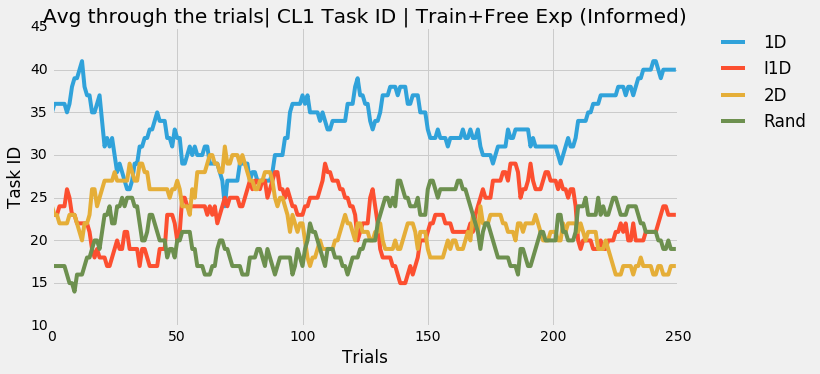

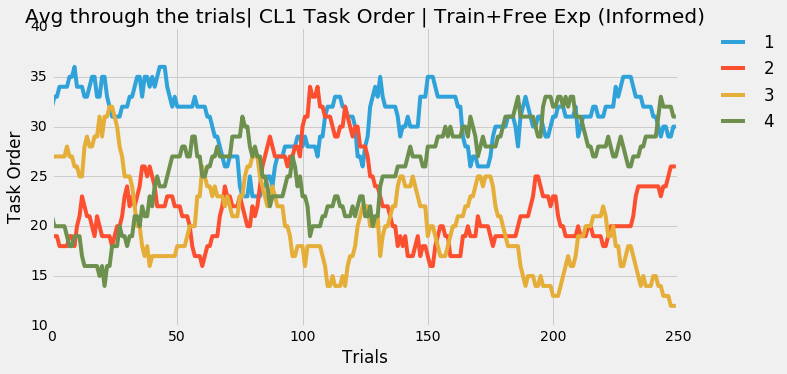

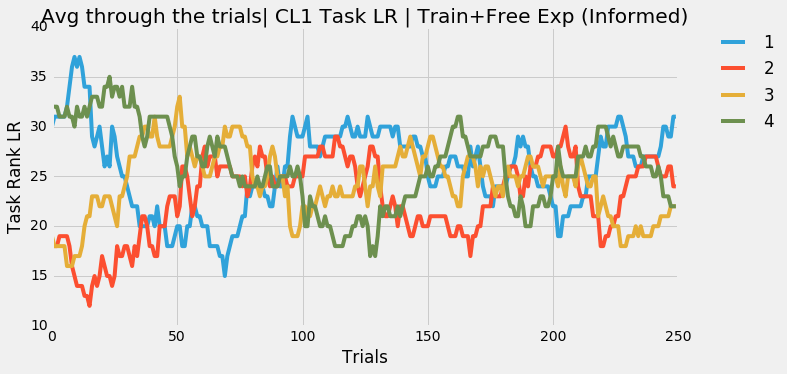

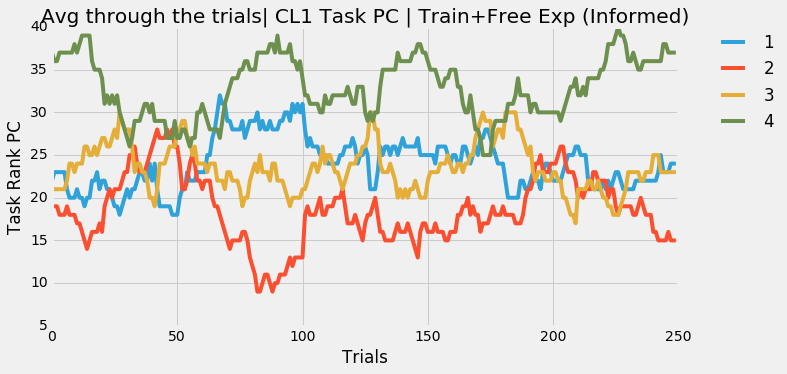

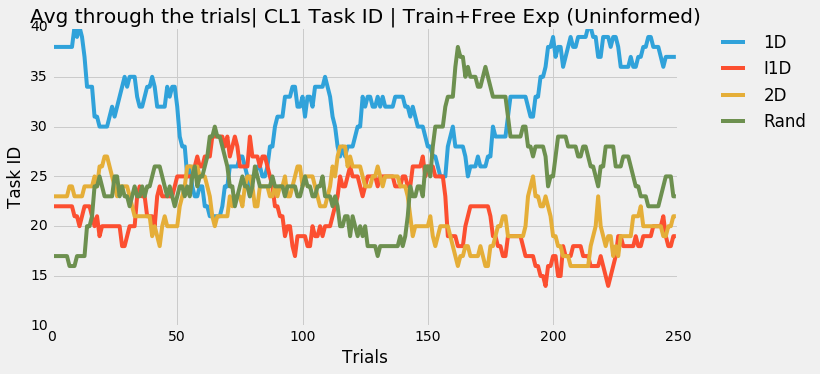

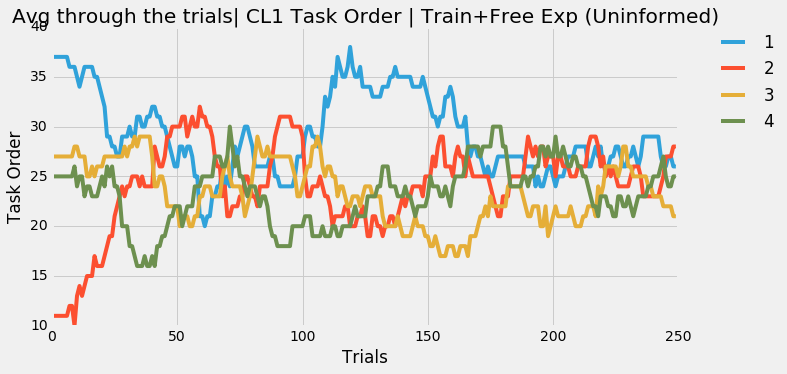

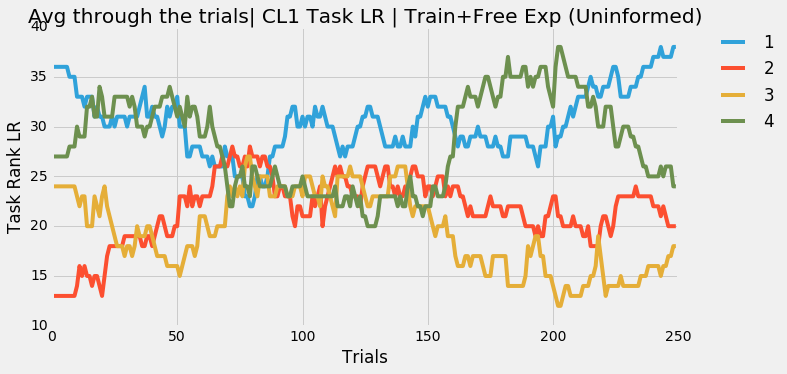

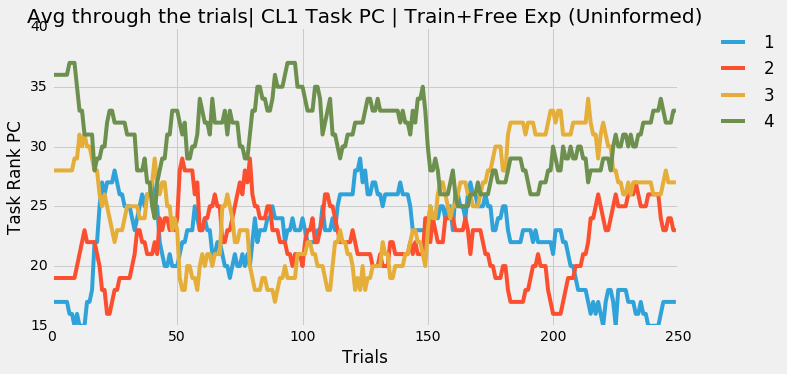

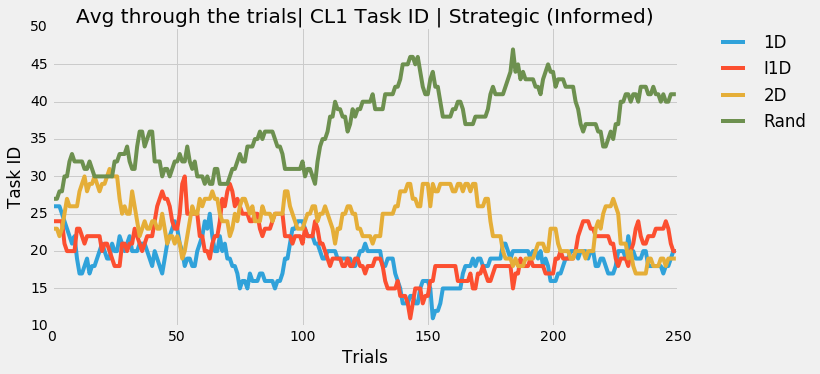

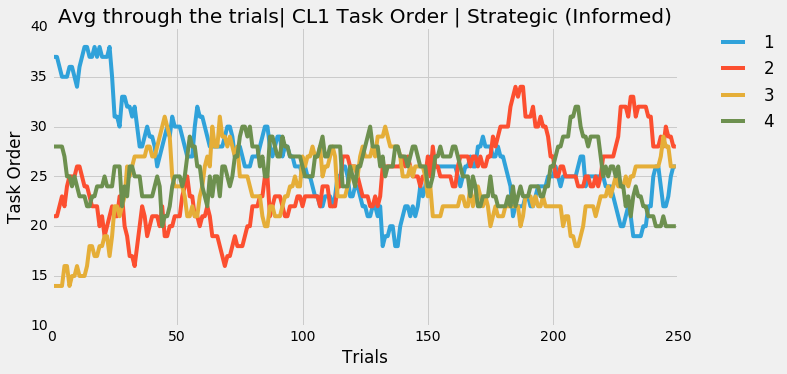

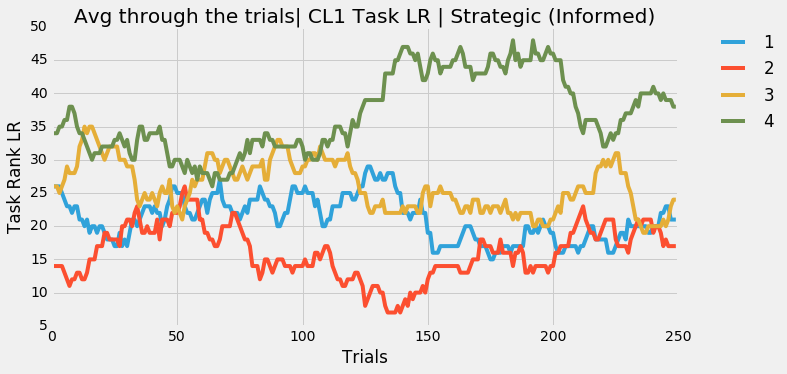

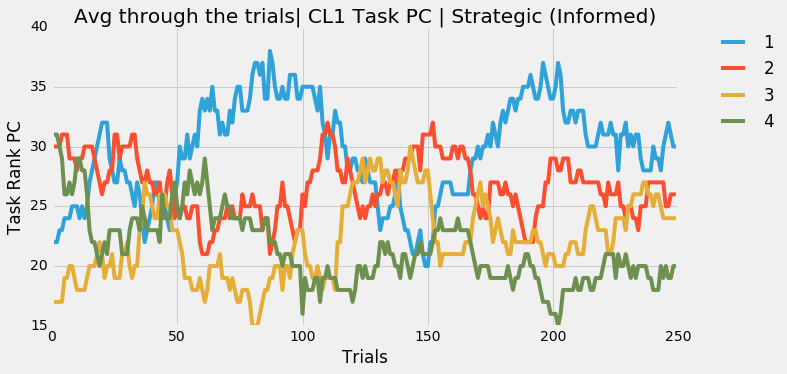

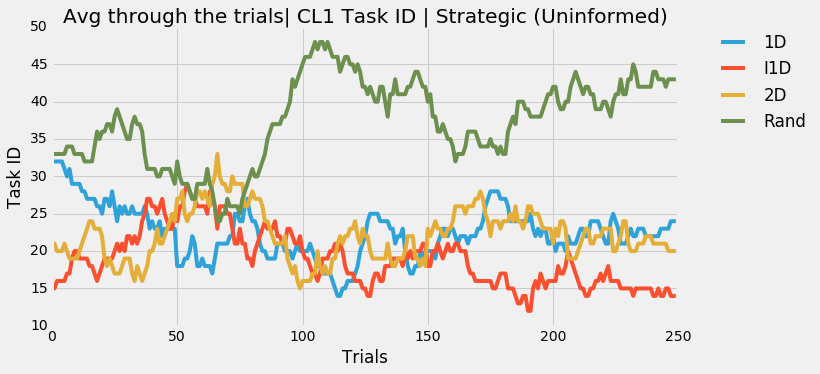

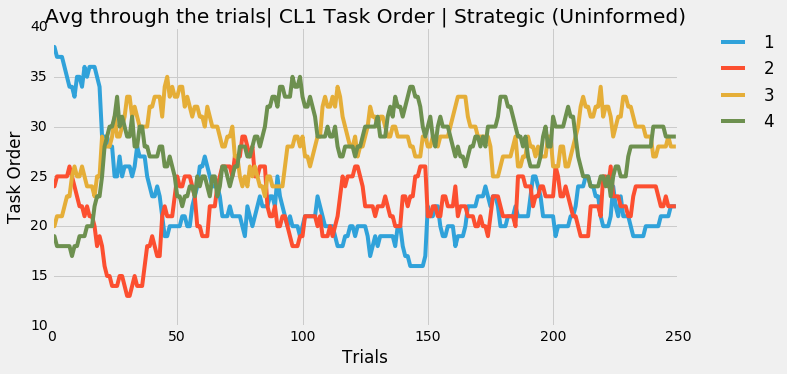

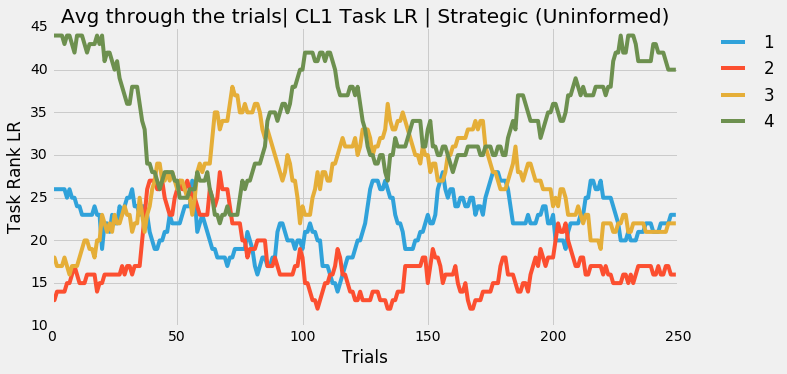

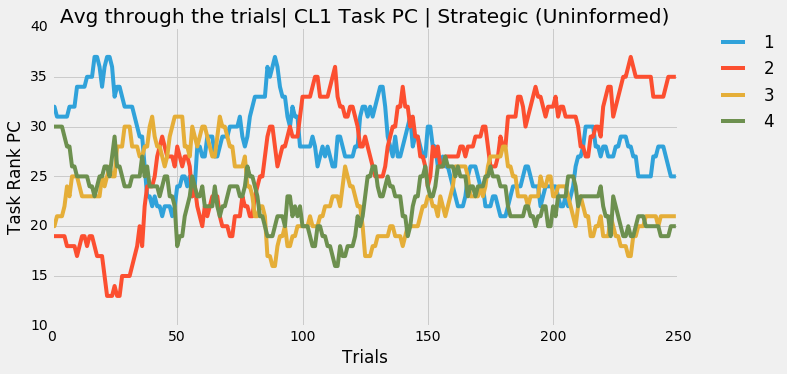

In [346]:
#Plot Task ID
def CL1_plot(x,y,group,ax,category,title,xlabel,ylabel):
   
    
    #print len(x),len(y)
    ax.set_title(title + "| "+group)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.plot(x,y,label = category)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


    
def CL1():
    
    title = "Avg through the trials| CL1"
    xlabel = "Trials"
    ylabel = ["Task ID","Task Order","Task Rank LR","Task Rank PC"]
    
    
    group_data_exp = [splitCsvFTEI,splitCsvFTEU,splitCsvSTEI,splitCsvSTEU]
    group_data_tr = [splitCsvFTTI,splitCsvFTTU,splitCsvSTTI,splitCsvSTTU]
    group_data_stack = [informedFT,uninformedFT,informedST,uninformedST]
    
    total_trials = 250
    
    
    #Iterate through groups
    for i in range(len(group_data_exp)):
        
        data_trial = []
        count_data_id = np.empty([total_trials,tasks])
        count_data_order = np.empty([total_trials,tasks])
        task_order = []
        task_LR =[]
        task_PC =[]
        count_data_LR = np.empty([total_trials,tasks])
        count_data_PC = np.empty([total_trials,tasks])
        
        # get order of training data for very user and change exploration task (task category listing)
        for user in range(len(group_data_exp[i])):
            tr_cat, tr_cat_index = np.unique(group_data_tr[i][user][:,1],return_index=True)
            order = tr_cat_index.argsort()
            transdict = {tr_cat[order][0]: 0, tr_cat[order][1]: 1, tr_cat[order][2]: 2,tr_cat[order][3]: 3}
            task_order.append(np.array([transdict[x] for x in group_data_exp[i][user][:,1]]))

        
        #get Learnability Rating for every user and change exploration task (task category listing)
        tr_cat = getRankOrder(group_data_stack[i],12)
    
        
        for user in range(len(group_data_exp[i])):
            transdict = {0:tr_cat[user][0],1: tr_cat[user][1],2: tr_cat[user][2], 3 :tr_cat[user][3]}
            task_LR.append(np.array([transdict[x] for x in group_data_exp[i][user][:,1]]))
        
        
        
        #get Percent Correct Rating for every user and change exploration task (task category listing)
        tr_cat = getRankOrder(group_data_stack[i],15)
    
        
        for user in range(len(group_data_exp[i])):
            transdict = {0:tr_cat[user][0],1: tr_cat[user][1],2: tr_cat[user][2], 3 :tr_cat[user][3]}
            task_PC.append(np.array([transdict[x] for x in group_data_exp[i][user][:,1]]))
            

        
        #Iterate through trials for every user
        for j in range(total_trials):
            
            # Iterate through every user on that particular trial
            
            # find count of categories according to task ID
            data_trial = [ x[j][1] for x in group_data_exp[i] ]
            
            # find count of categories according to task order in training
            data_order = [ x[j] for x in task_order ]
            
            # find count of categories according to rank LR in training
            data_LR = [ x[j] for x in task_LR ]
            
            # find count of categories according to rank PC in training
            data_PC = [ x[j] for x in task_PC ]
        
            
            # Get count of task id ( for now )
            _, temp = np.unique(data_trial,return_counts=True)
            count_data_id[j] = temp
            
            # Get count of task order
            _, temp = np.unique(data_order,return_counts=True)
            count_data_order[j] = temp
            
             # Get count of task rank LR
            _, temp = np.unique(data_LR,return_counts=True)
            count_data_LR[j] = temp
            
             # Get count of task rank PC
            _, temp = np.unique(data_PC,return_counts=True)
            count_data_PC[j] = temp
        
        
        # Plot data for group and task category
        fig, ax = plt.subplots(figsize=(10, 5))
        
        # Iterate through task categories
        for k in range(tasks):
            # Iterate through all trials
            CL1_plot(np.arange(total_trials),count_data_id[:,k],group_labels[i],ax,task_categories[k],title+" Task ID ",xlabel,ylabel[0])
        
        # Plot data for group and task category
        fig, ax = plt.subplots(figsize=(10, 5))
        
        # Iterate through task categories
        for k in range(tasks):
            # Iterate through all trials
            CL1_plot(np.arange(total_trials),count_data_order[:,k],group_labels[i],ax,k+1,title+" Task Order ",xlabel,ylabel[1])
        
        # Plot data for group and task category
        fig, ax = plt.subplots(figsize=(10, 5))
        
        # Iterate through task categories
        for k in range(tasks):
            # Iterate through all trials
            CL1_plot(np.arange(total_trials),count_data_LR[:,k],group_labels[i],ax,k+1,title+" Task LR ",xlabel,ylabel[2])
        
        # Plot data for group and task category
        fig, ax = plt.subplots(figsize=(10, 5))
        
        # Iterate through task categories
        for k in range(tasks):
            # Iterate through all trials
            CL1_plot(np.arange(total_trials),count_data_PC[:,k],group_labels[i],ax,k+1,title+" Task PC ",xlabel,ylabel[3])

CL1()


### Streak Analysis

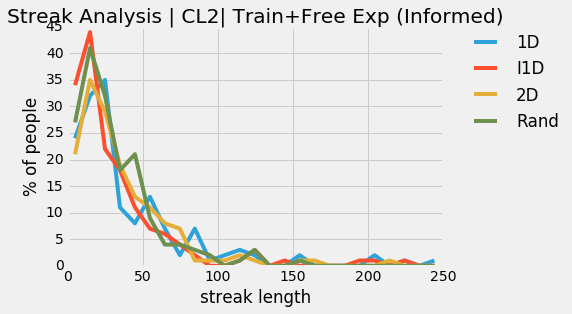

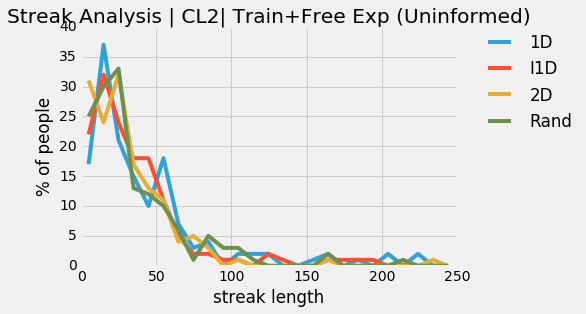

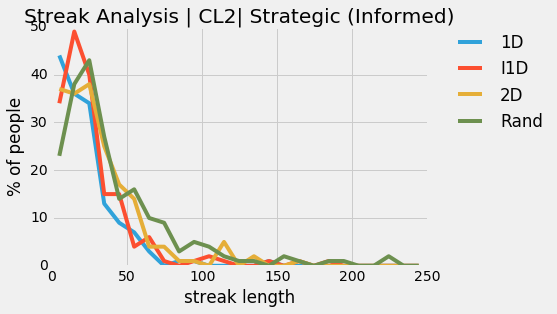

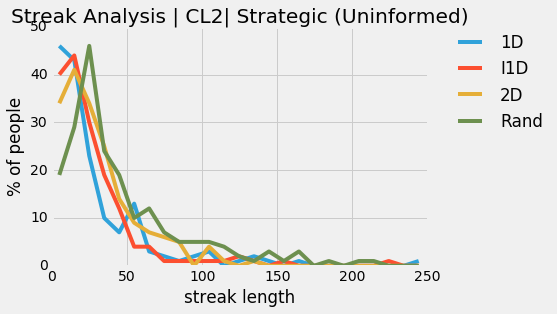

In [103]:


def CL2Count(arr):
    countdist = [[] for i in range(4)]
    #Iterate over all users
    
    for i in range(len(arr)):
        # Iterating over categories
        for j in range(4):
            countdist[j].extend(arr[i][0][arr[i][1] == j])
    return countdist

        

def CL2():
    
    title = "Streak Analysis | CL2| "
    xlabel = "streak length"
    ylabel = "% of people"
    begin = 0

    data_group = [splitCsvFTEI,splitCsvFTEU,splitCsvSTEI,splitCsvSTEU]
    total_trials = 250
    for i in range(len(data_group)):
        a = np.array(StreakArray(data_group[i],total_trials,begin))
        
        # Iterate over tasks
        linehistogram(CL2Count(a),np.linspace(0,total_trials-1,26),title+group_labels[i],task_categories,xlabel,ylabel)

CL2()


### Closed Loop 2

'\ni = 10\n#print StreakArray(splitCsvFTEI,250,0)[0]\na = getProbSwitch(splitCsvFTEI,np.array(StreakArray(splitCsvFTEI,250,0)),250)[i]\n\nb = StreakArray(splitCsvFTEI,250,0)[i]\n\nprint splitCsvFTEI[i][:,1]\nprint b\nprint np.unique(np.sort(b[0][:-1]))\nprint a[np.nonzero(a)]\n#print \n'

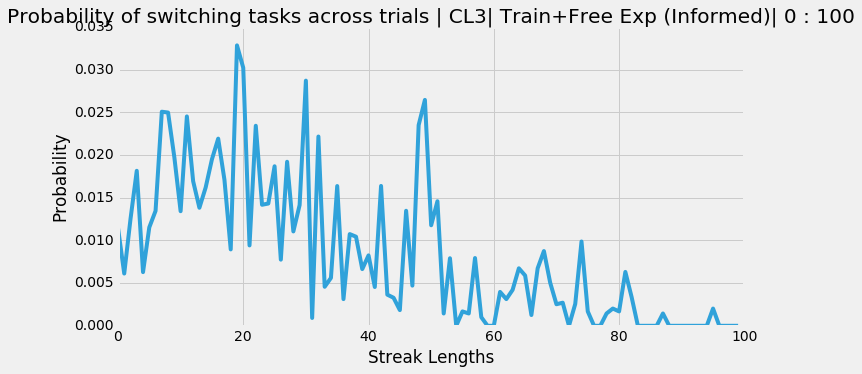

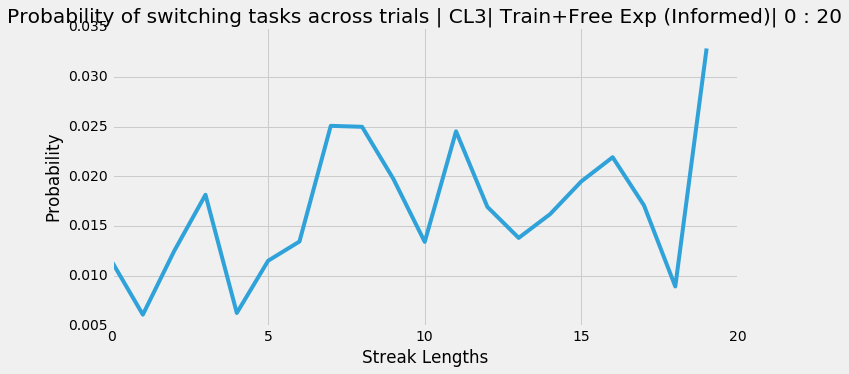

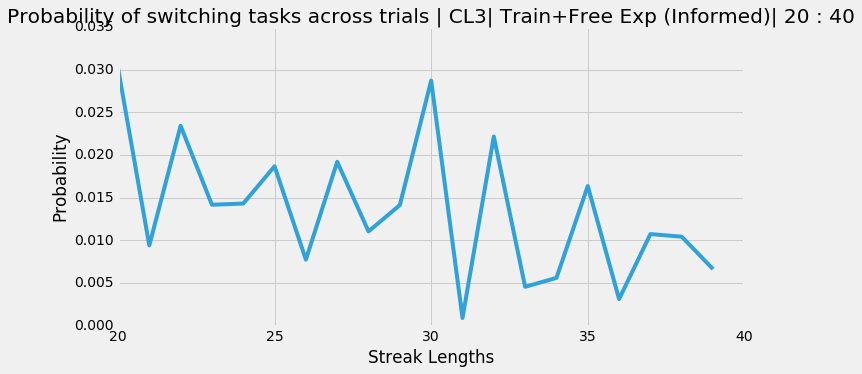

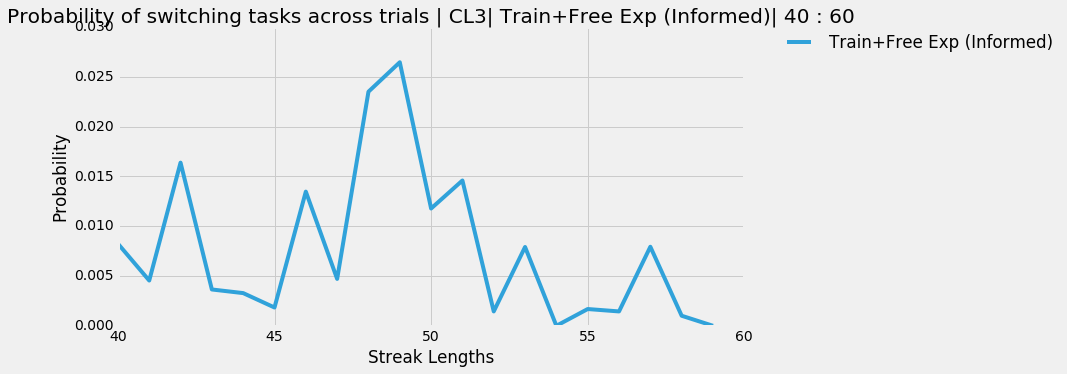

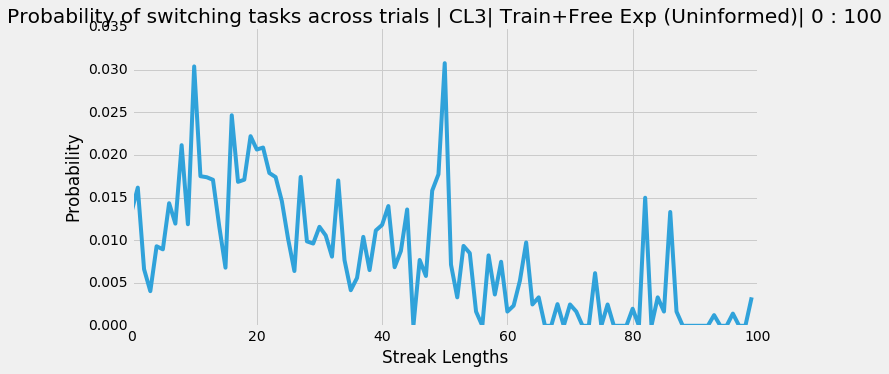

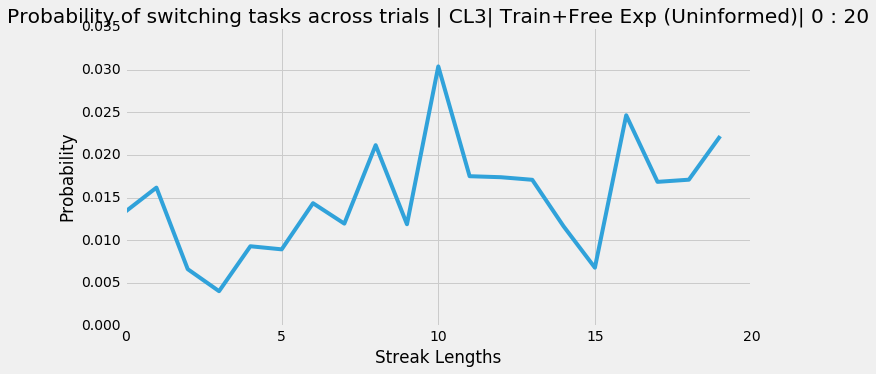

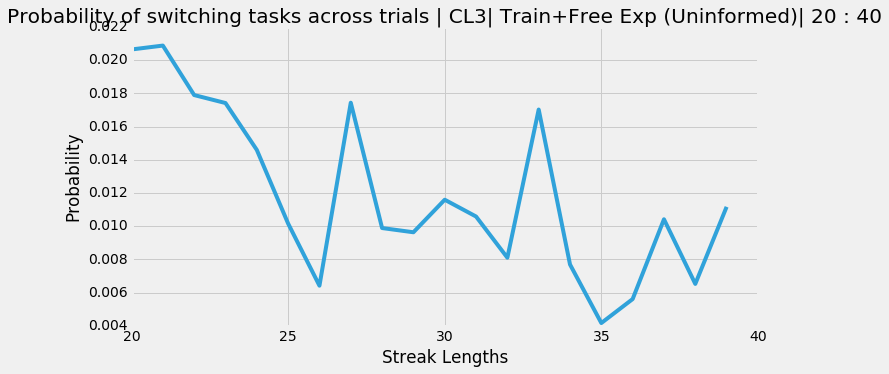

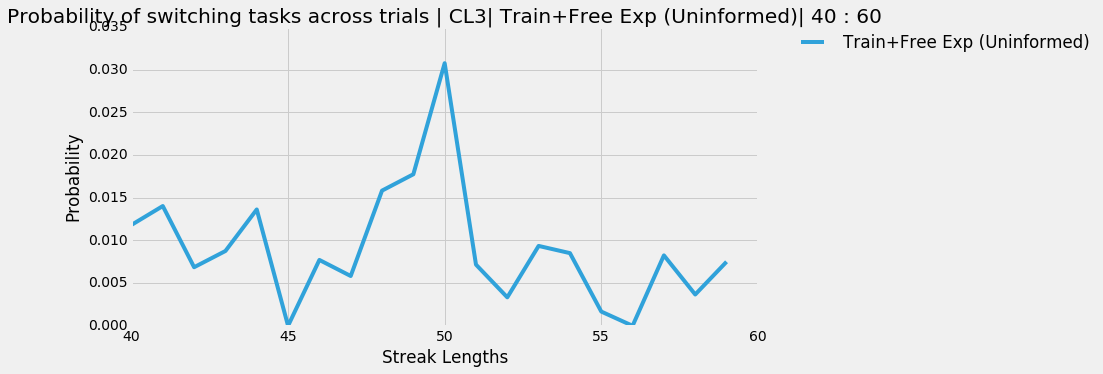

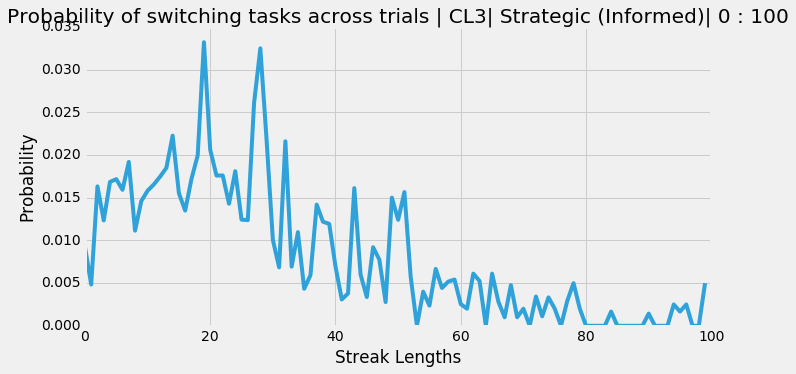

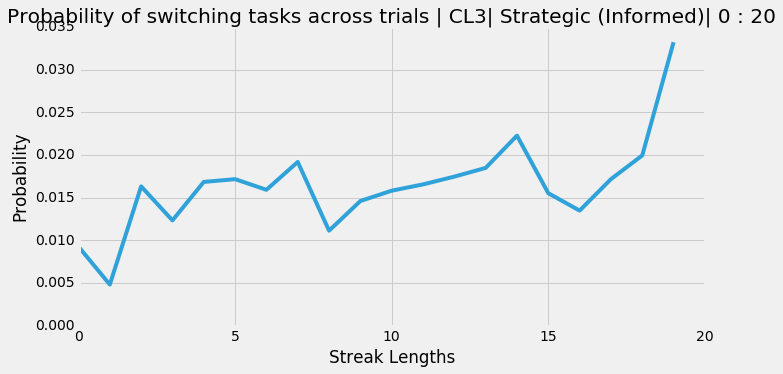

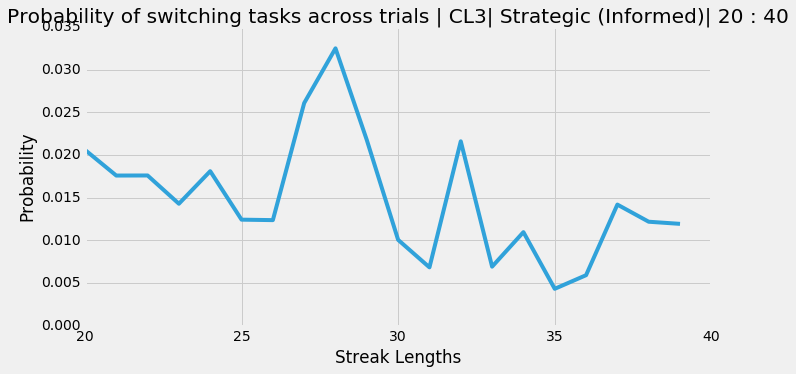

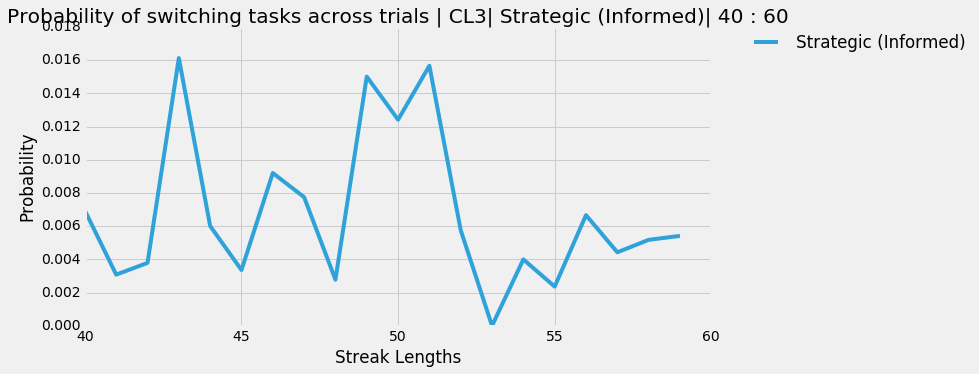

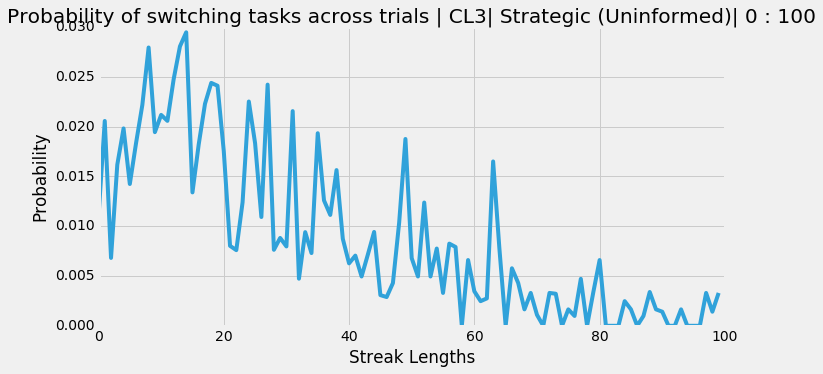

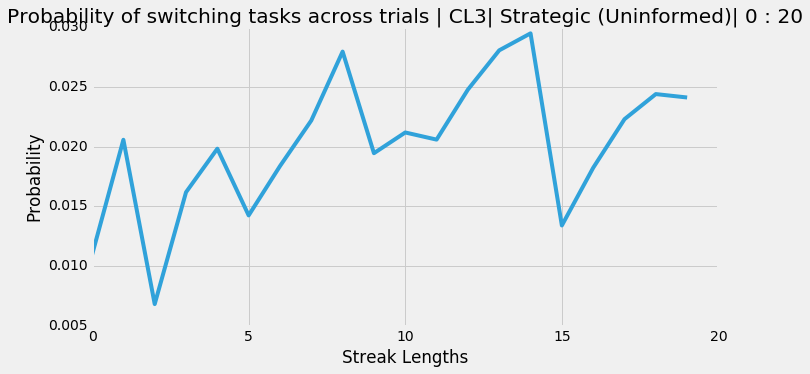

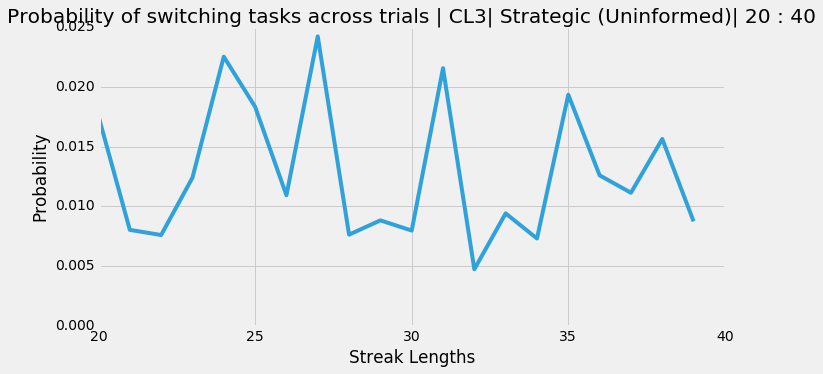

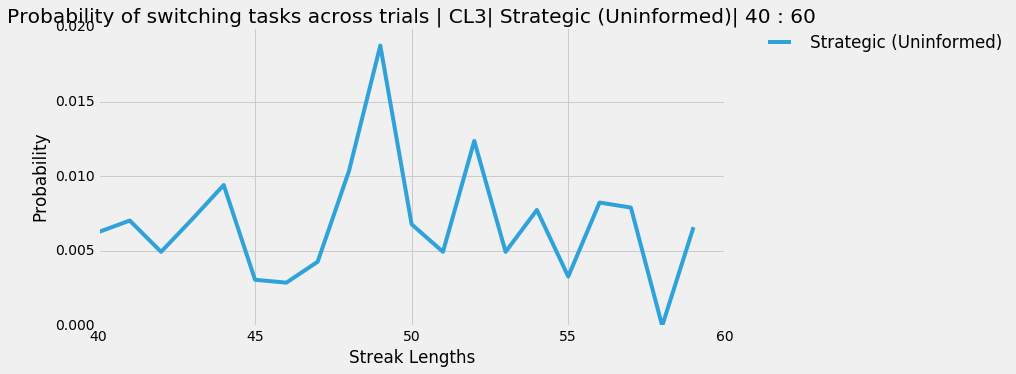

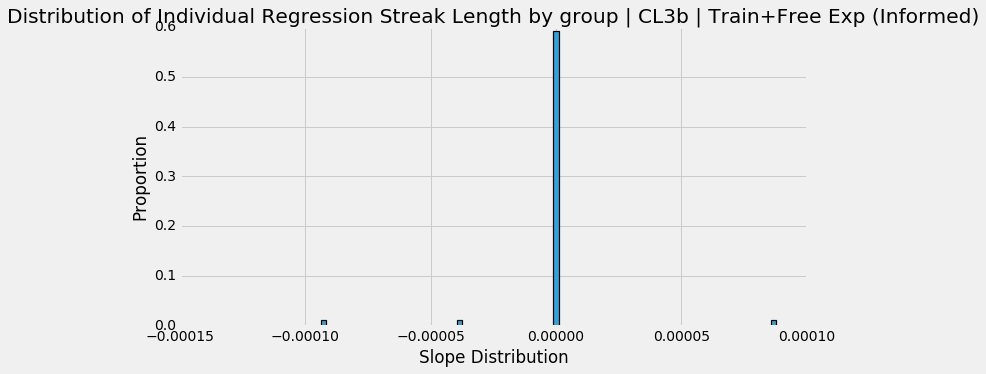

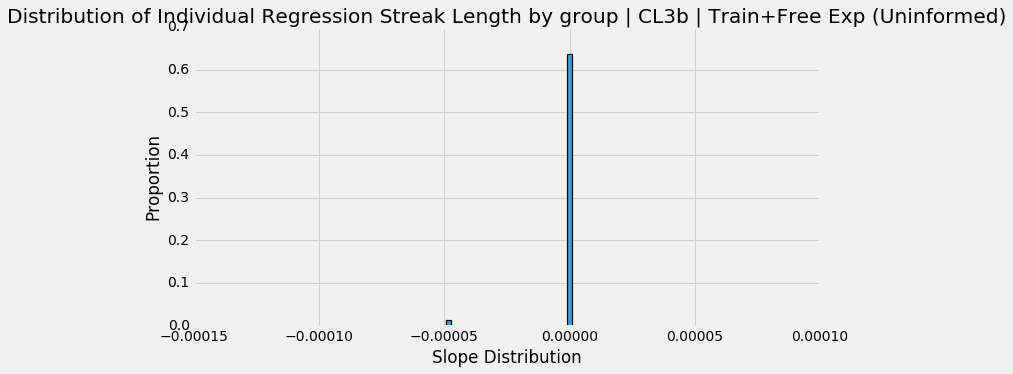

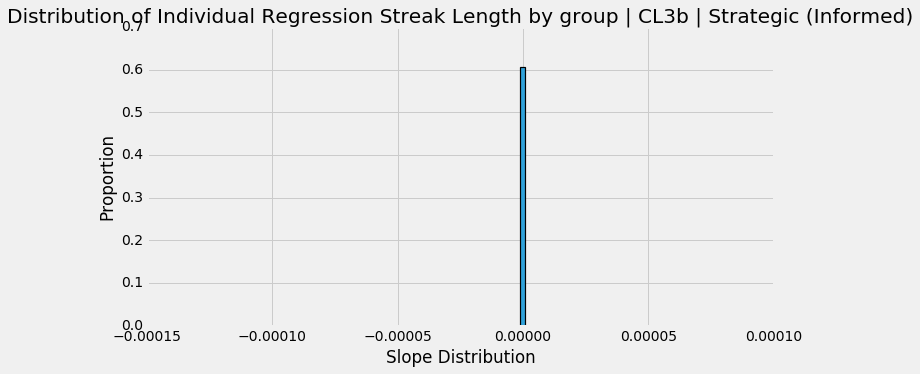

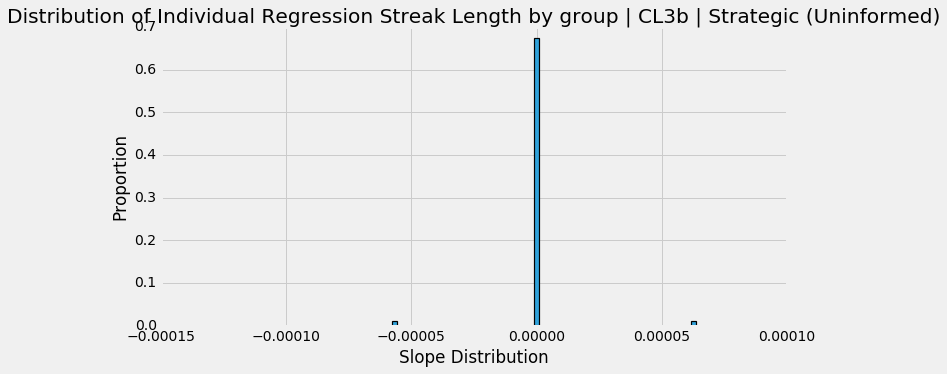

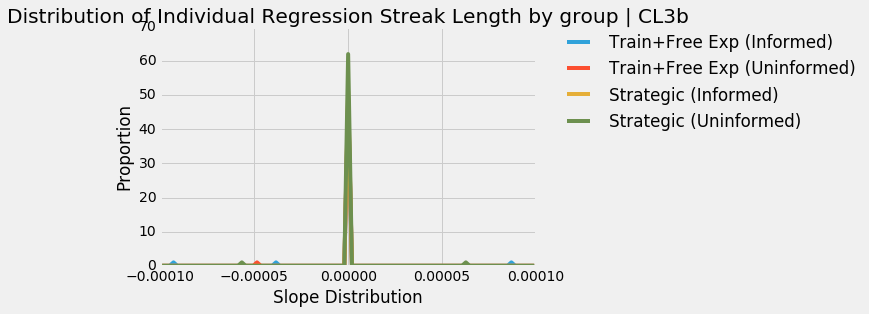

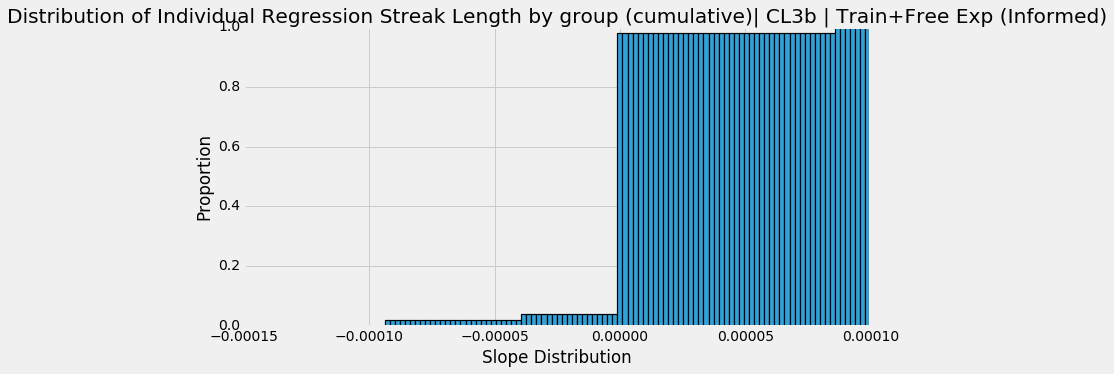

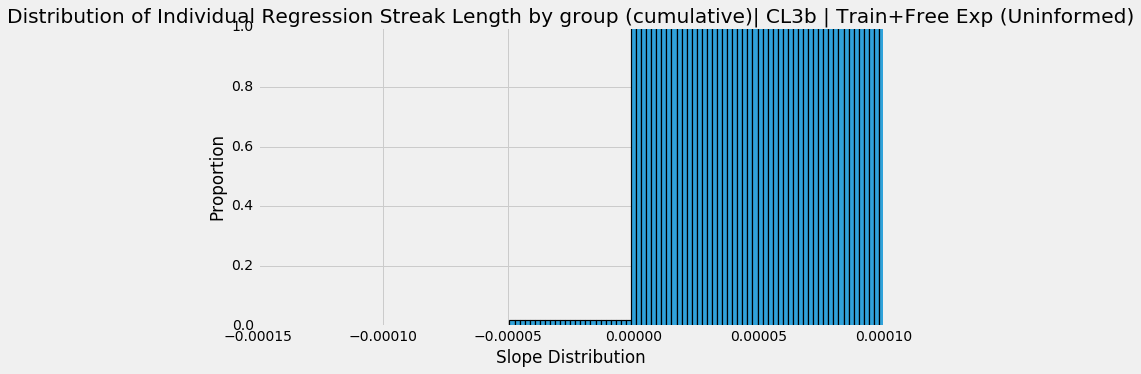

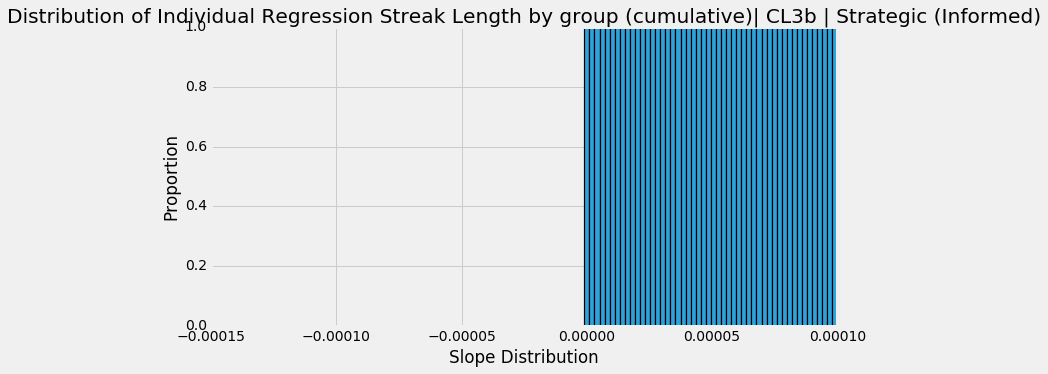

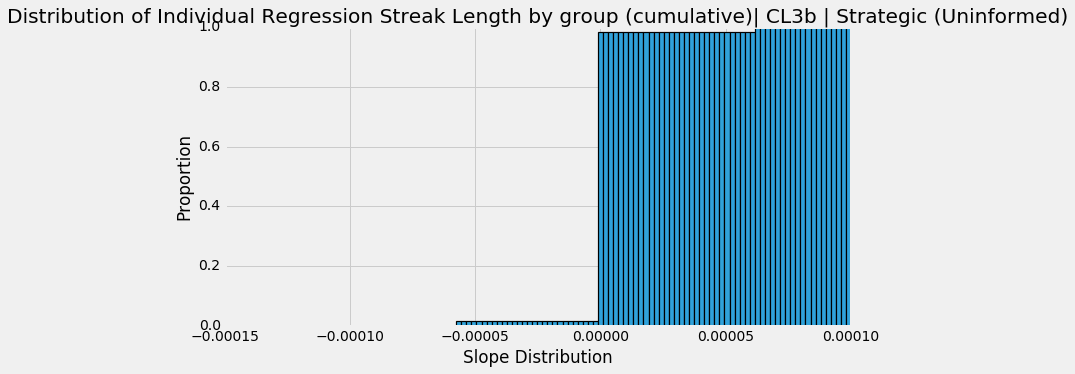

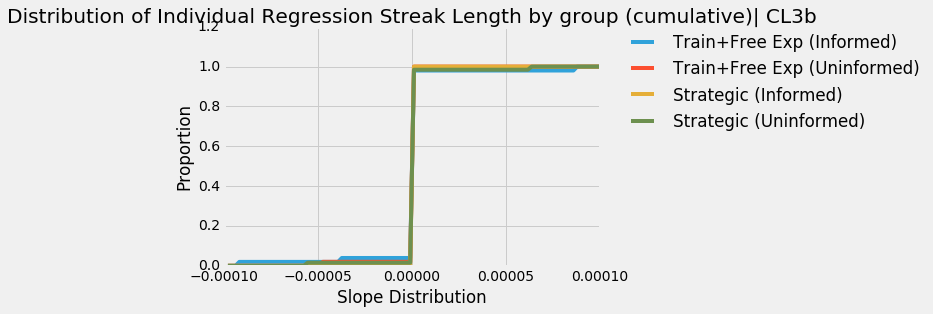

In [104]:

def CL3():
    
    data_group = [splitCsvFTEI,splitCsvFTEU,splitCsvSTEI,splitCsvSTEU]   
    begin = 0
    total_trials = 250
    title = "Probability of switching tasks across trials | CL3"
    xlabel = "Streak Lengths"
    ylabel = "Probability"
    
    for i in range(len(data_group)):
        
        
        streakList = np.array(StreakArray(data_group[i],total_trials,begin))
        probSwitch = getProbSwitch(data_group[i],streakList,total_trials)
        
       
        
        fig, ax = plt.subplots(figsize=(10, 5))
        
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title+ "| "+group_labels[i]+"| "+ "0 : 100")
        ax.plot(np.arange(100),probSwitch.mean(axis = 0)[0:100],label = group_labels[i])
        
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title+ "| "+group_labels[i]+ "| "+ "0 : 20")
        ax.plot(np.arange(20),probSwitch.mean(axis = 0)[0:20],label = group_labels[i])
        
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title+ "| "+group_labels[i]+ "| "+ "20 : 40")
        ax.plot(np.arange(20,40),probSwitch.mean(axis = 0)[20:40],label = group_labels[i])
        
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title+ "| "+group_labels[i]+ "| "+ "40 : 60")
        ax.plot(np.arange(40,60),probSwitch.mean(axis = 0)[40:60],label = group_labels[i])
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    


def CL3b():
    data_group = [splitCsvFTEI,splitCsvFTEU,splitCsvSTEI,splitCsvSTEU]
    begin = 0
    total_trials = 250
    
    #list for storing slope of regression on each 
    regressionSlope =[[] for x in xrange(len(data_group))]
    
    for i in range(len(data_group)):
        probSwitch = np.zeros((len(data_group[i]),total_trials))
        streakList = np.array(StreakArray(data_group[i],total_trials,begin))
        
        #Histogram data
        bins = np.linspace(-0.0001,0.0001,100)
        title = "Distribution of Individual Regression Streak Length by group | CL3b"
        xlabel = "Slope Distribution"
        ylabel = "Proportion"
        
        probSwitch = getProbSwitch(data_group[i],streakList,total_trials)
        # Iterate through list
        temp = []
        for j in range(len(streakList)):
            
            if len(streakList[j][0]) > 1:
                temp.append(stats.linregress(np.unique(np.sort(streakList[j][0][:-1])),probSwitch[j][np.nonzero(probSwitch[j])])[0])
        regressionSlope[i].extend(np.array(temp))
    
    
    
    for i in range(len(data_group)):
        histogramPercentage([x for x in regressionSlope[i] if str(x) != 'nan'],bins,title,group_labels[i],xlabel,ylabel)
        
    linehistogram([ [x for x in y if str(x) != 'nan'] for y in regressionSlope],bins,title,group_labels,xlabel,ylabel)
    
    title = "Distribution of Individual Regression Streak Length by group (cumulative)| CL3b"    
    for i in range(len(data_group)):
        cumulativeHistogram([x for x in regressionSlope[i] if str(x) != 'nan'],bins,title,group_labels[i],xlabel,ylabel)
        
    cumulativeLinehistogram([ [x for x in y if str(x) != 'nan'] for y in regressionSlope],bins,title,group_labels,xlabel,ylabel)    
        
        
        
    
        
CL3()
CL3b()



### CL5 - does performance on the final test correlate with length of engagement with a task?

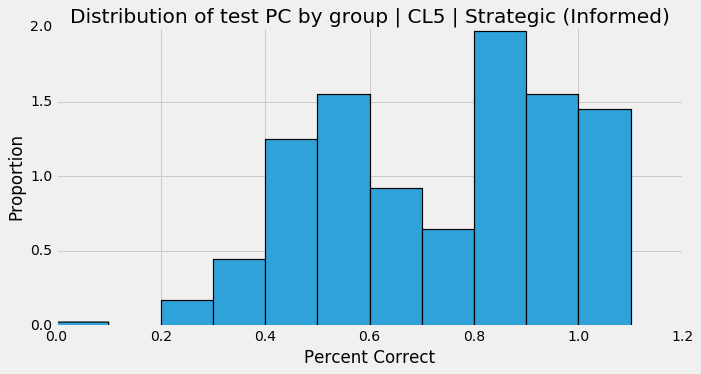

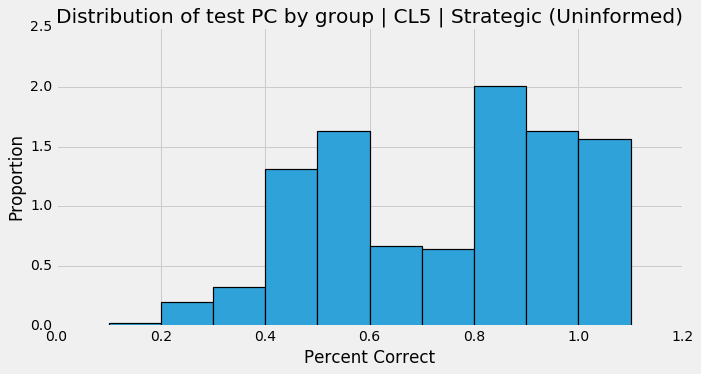

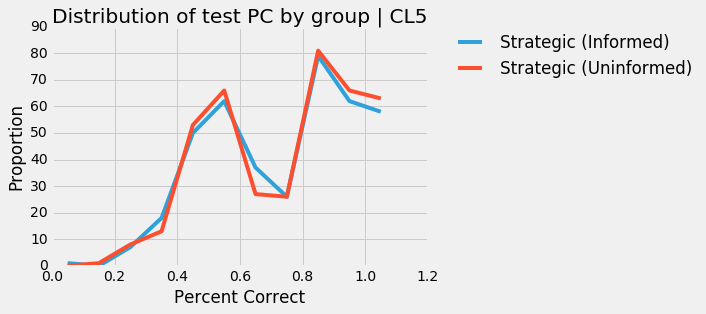

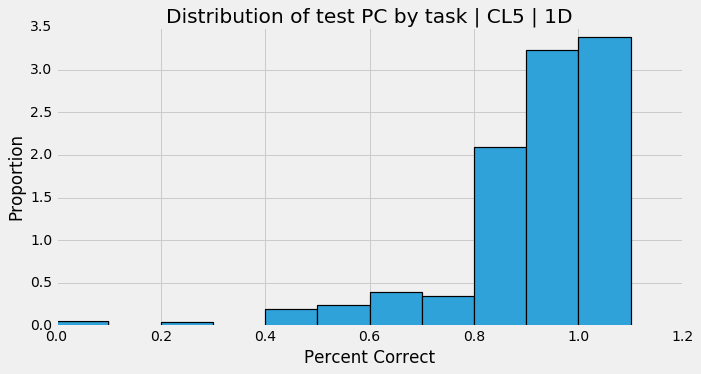

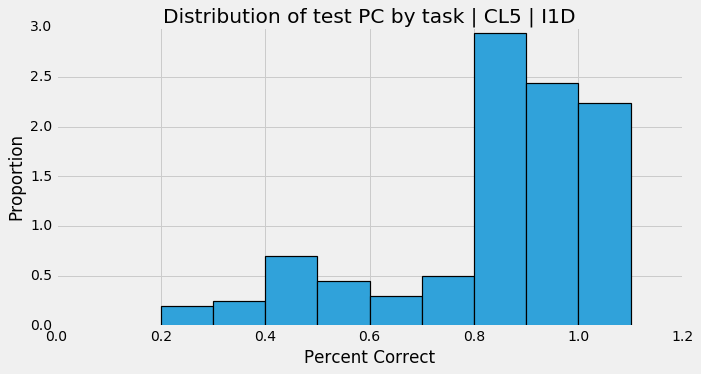

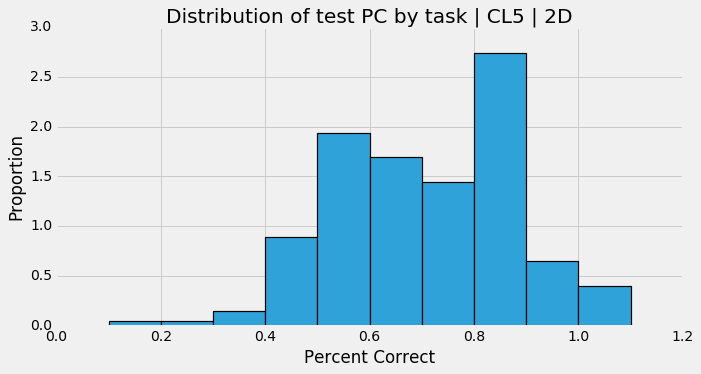

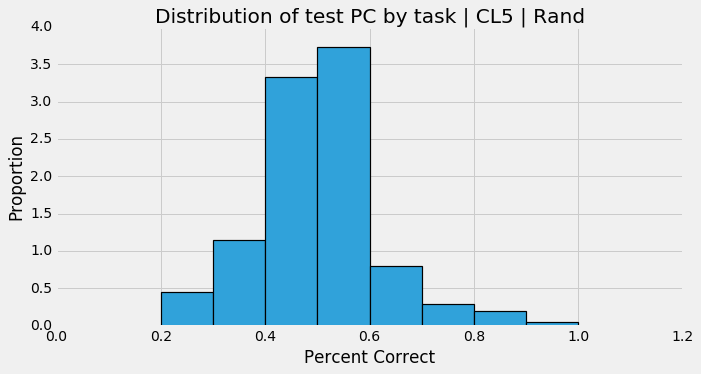

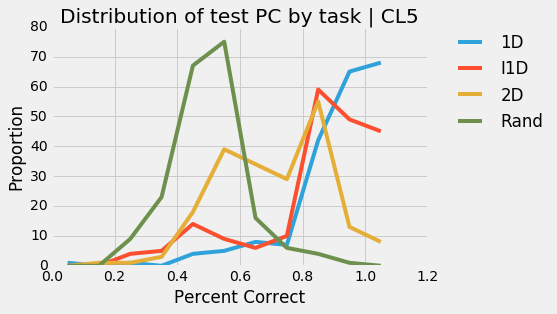

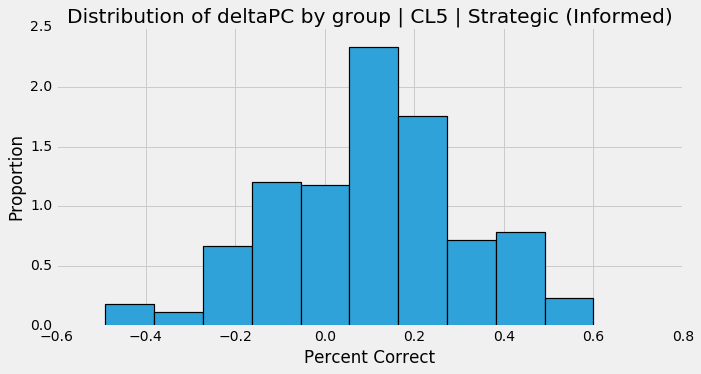

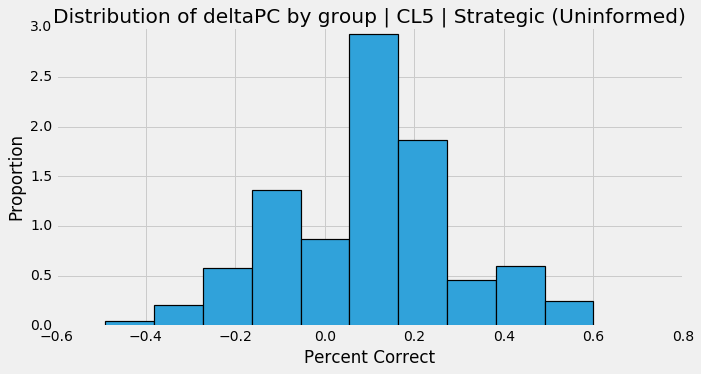

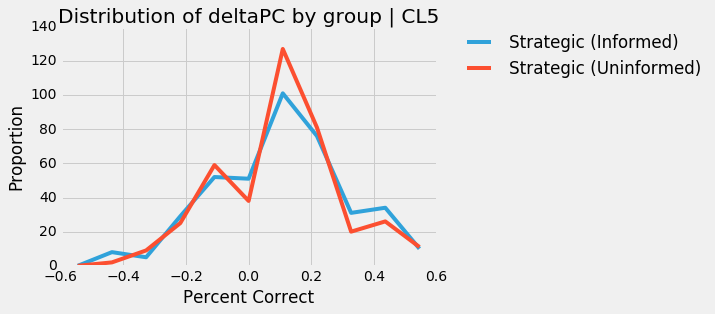

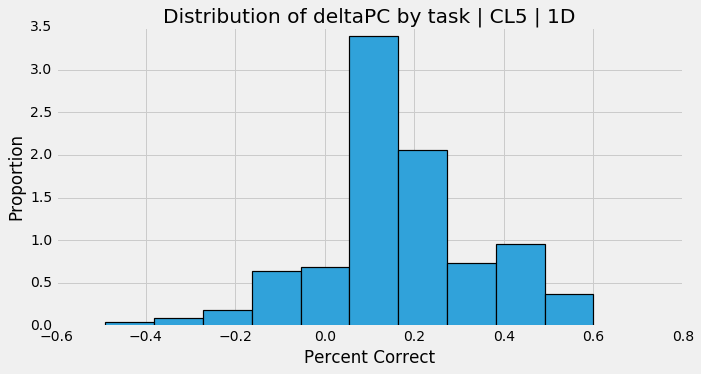

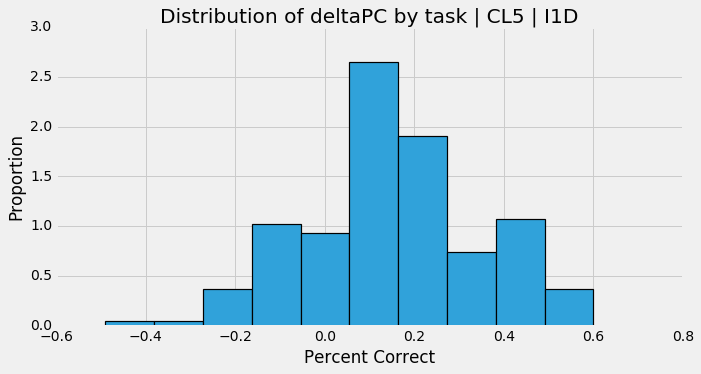

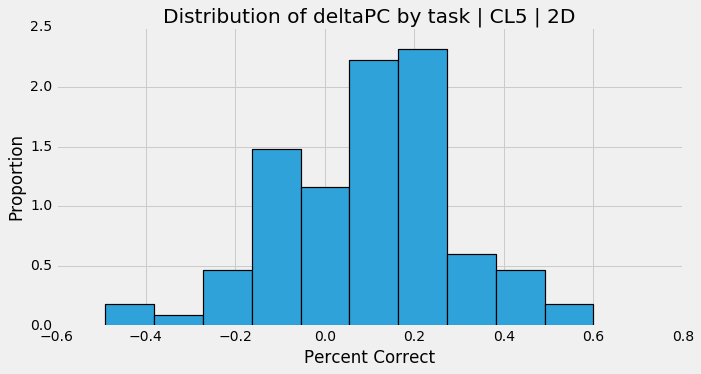

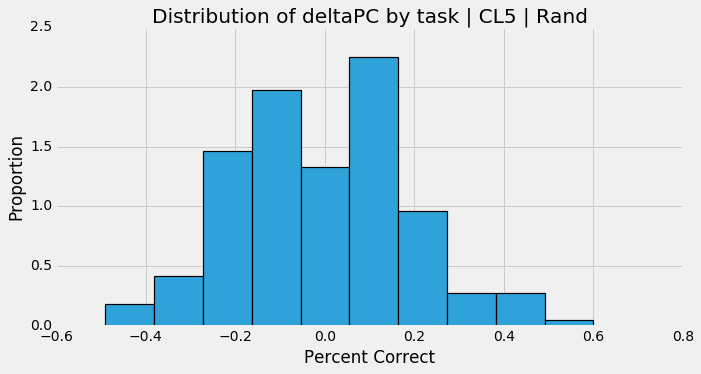

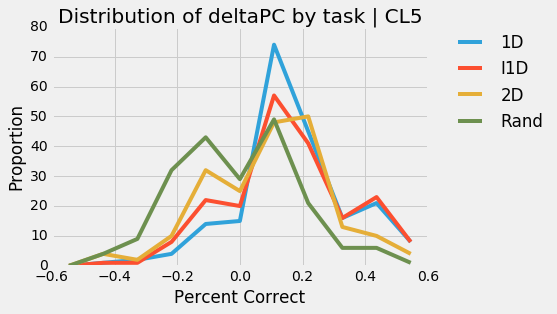

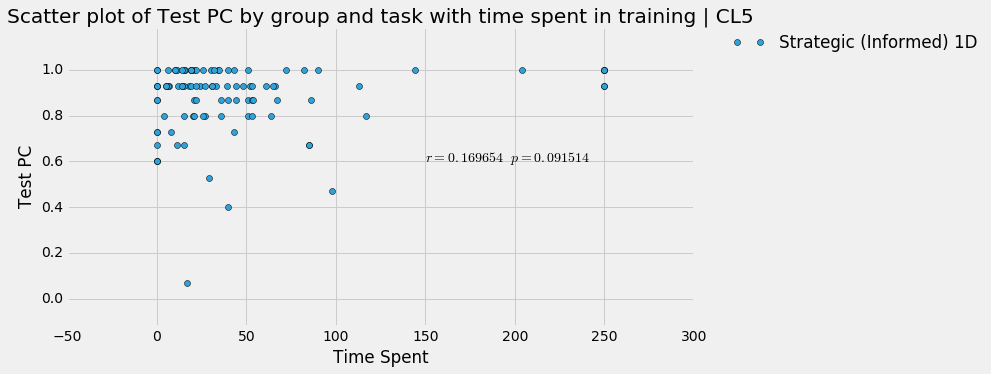

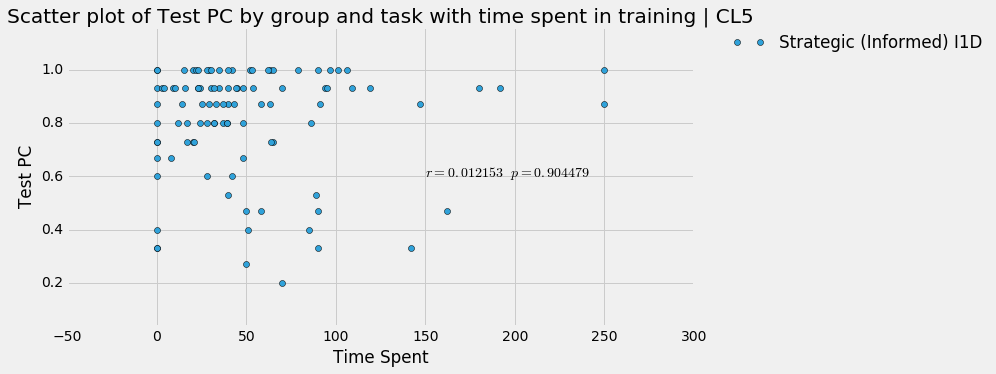

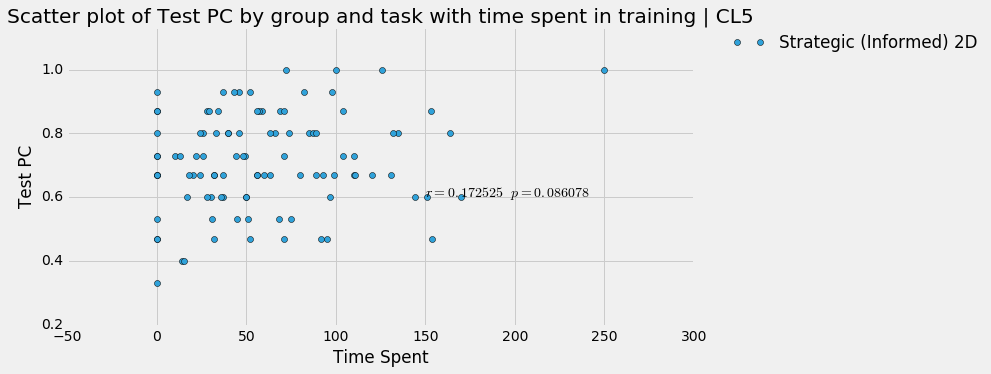

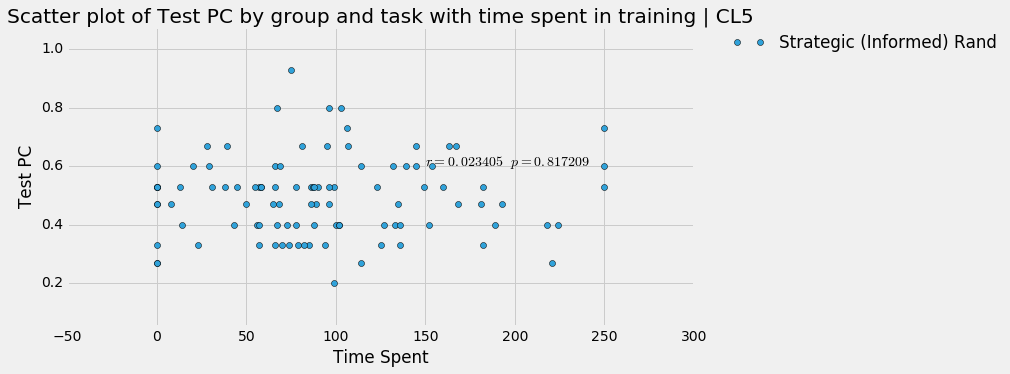

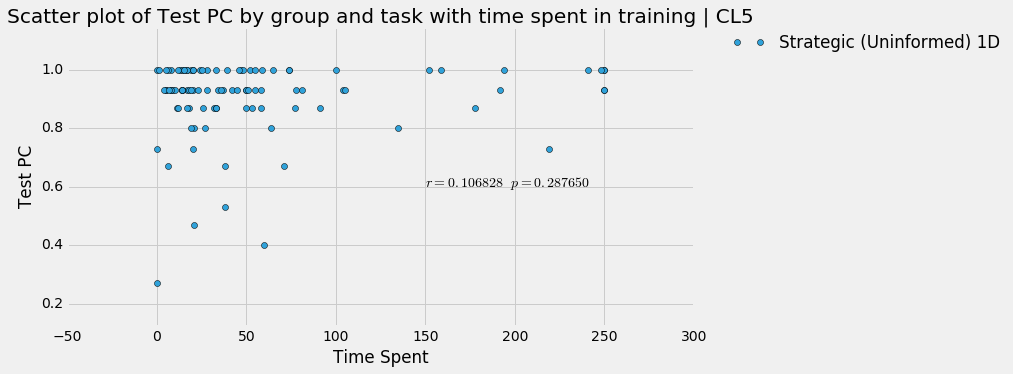

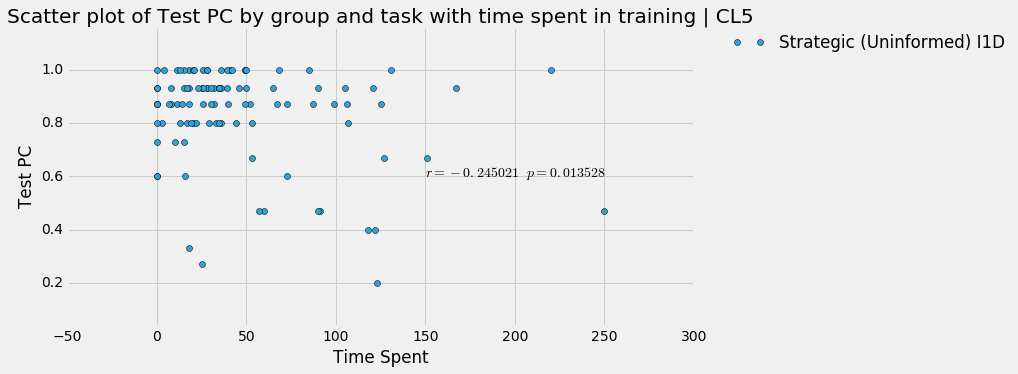

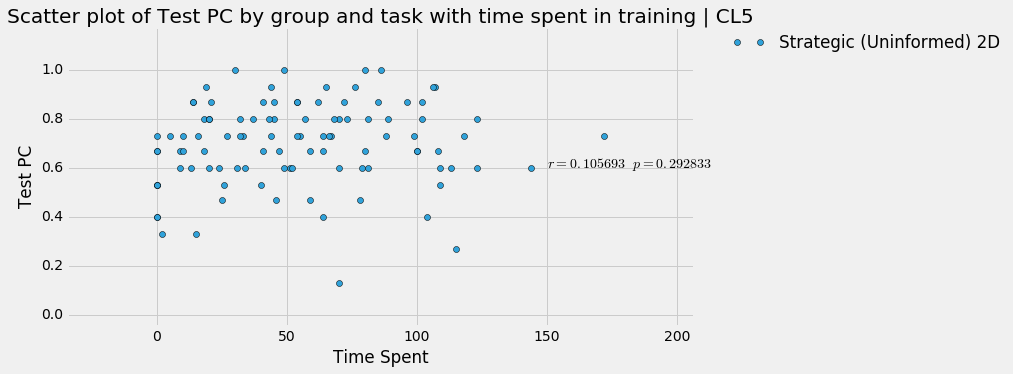

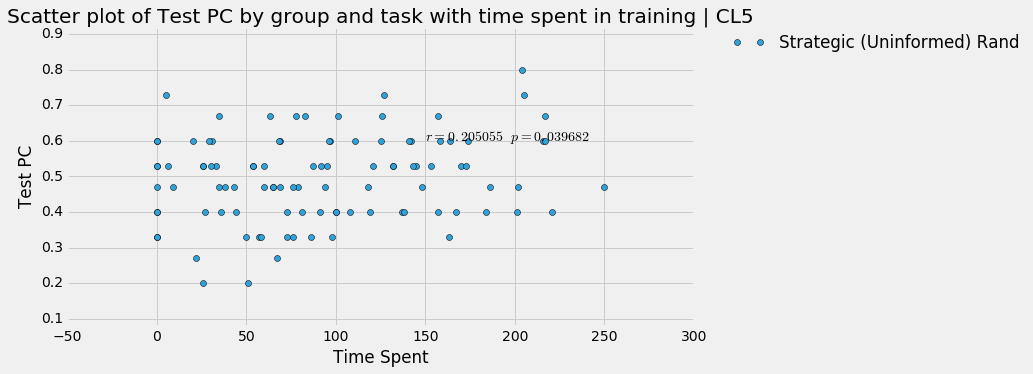

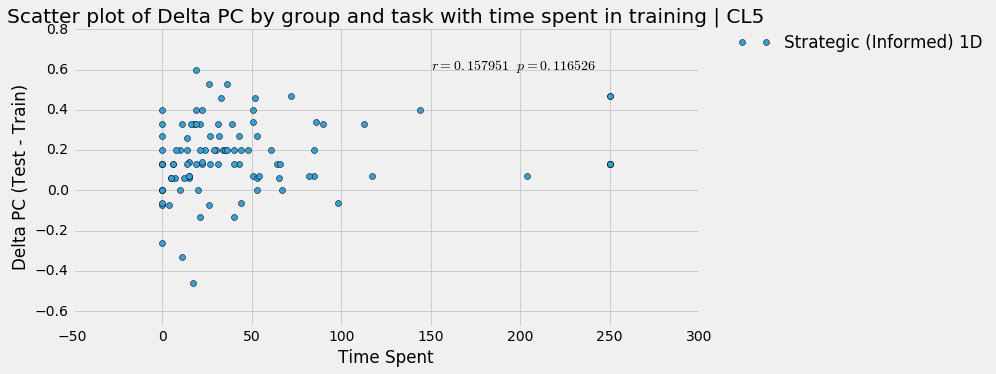

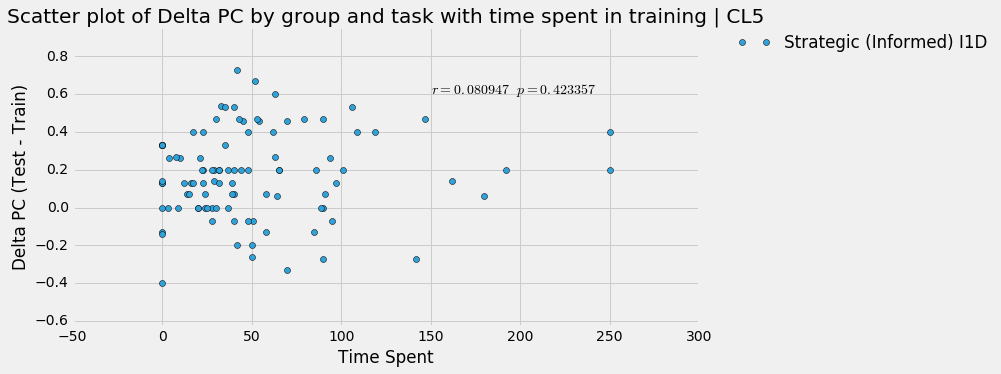

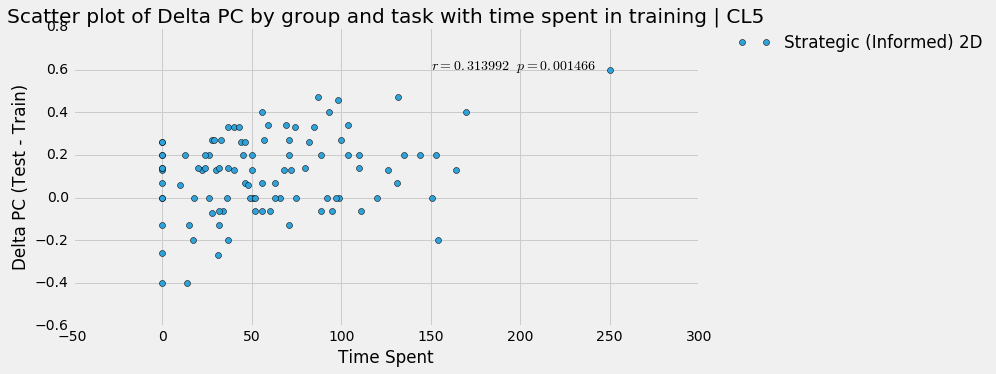

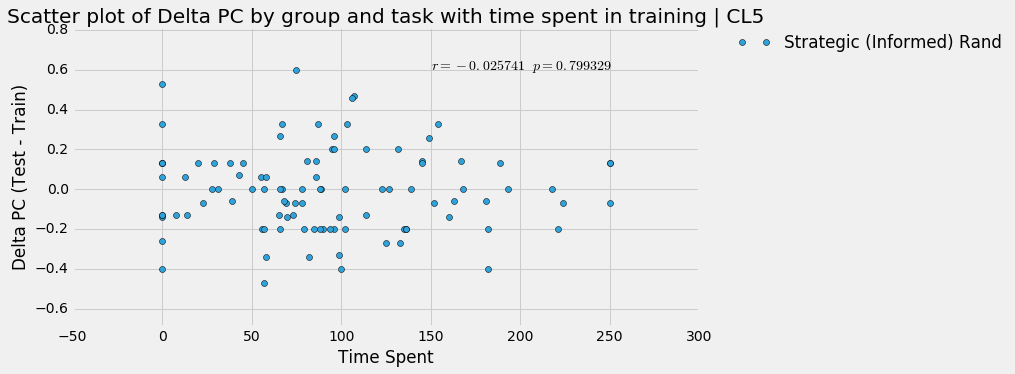

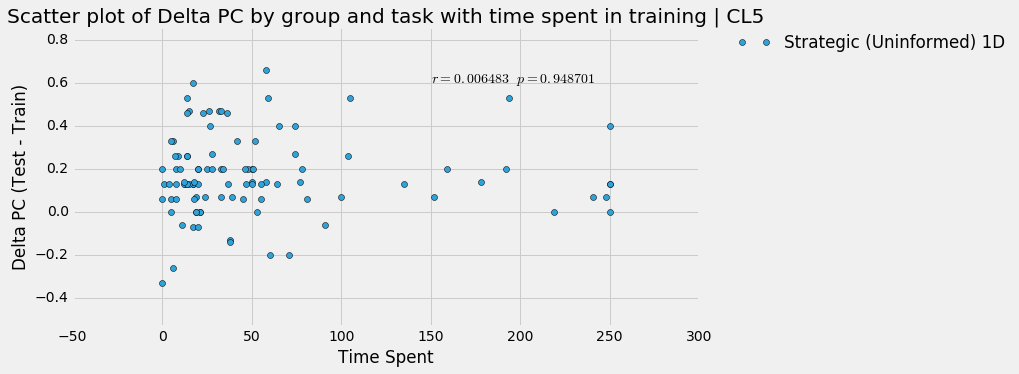

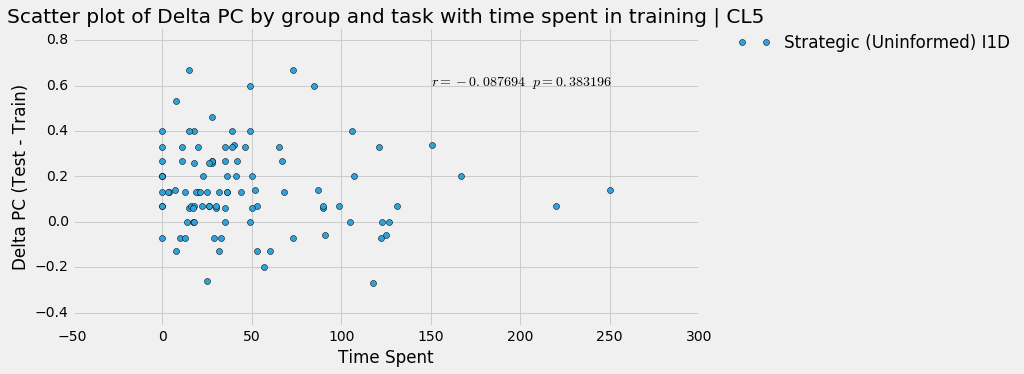

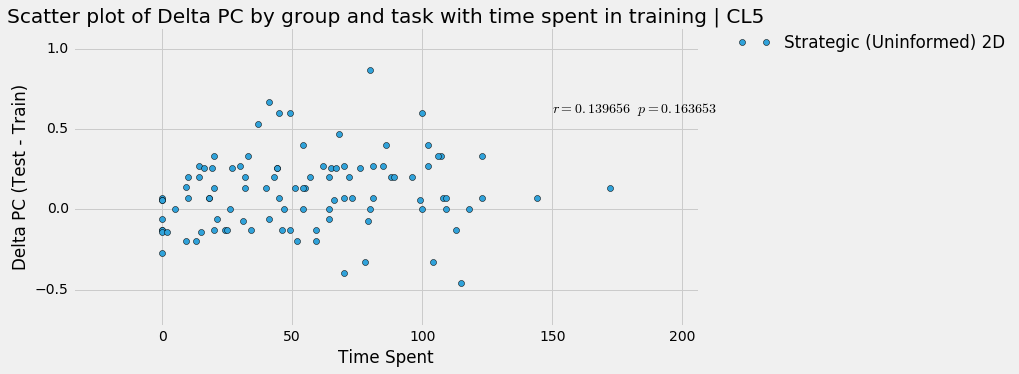

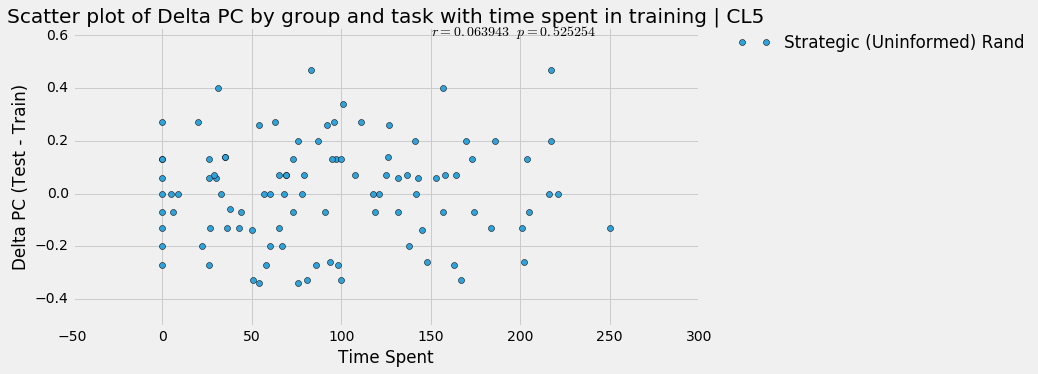

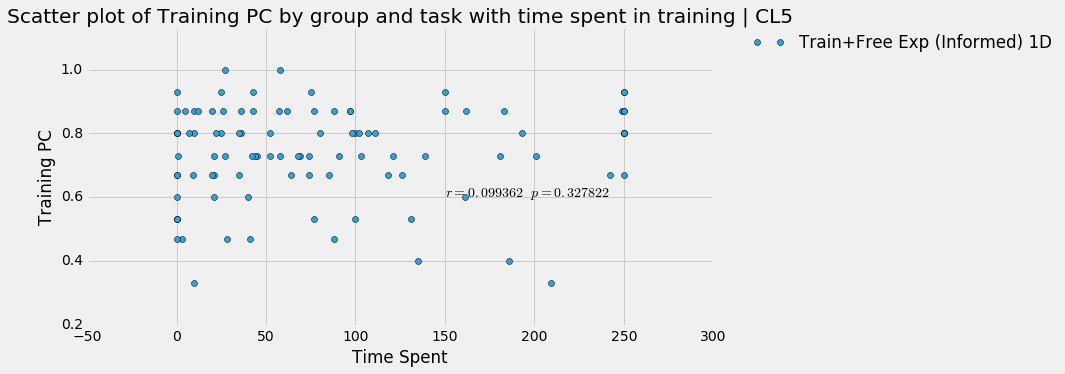

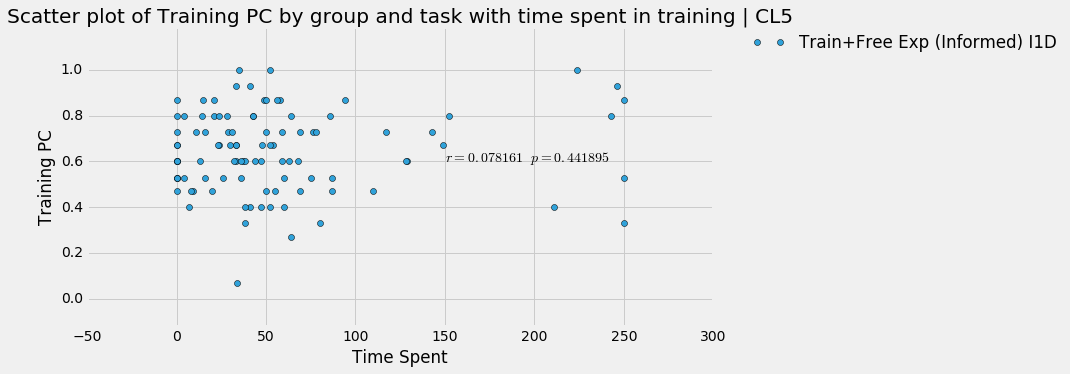

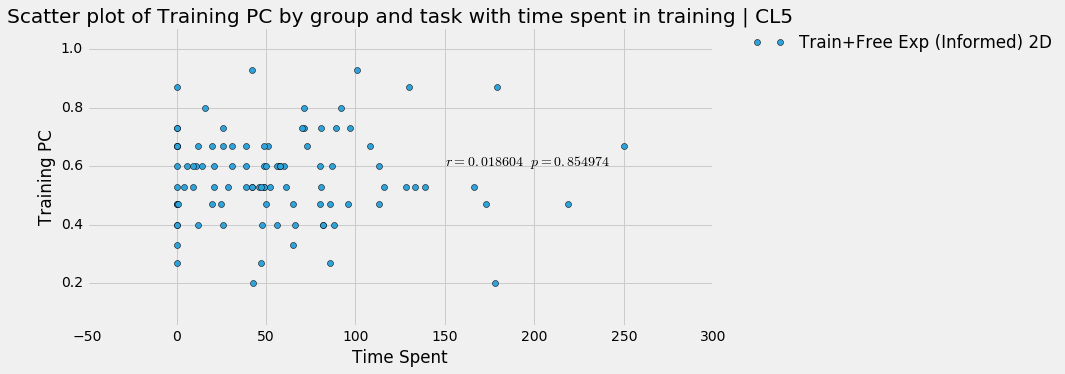

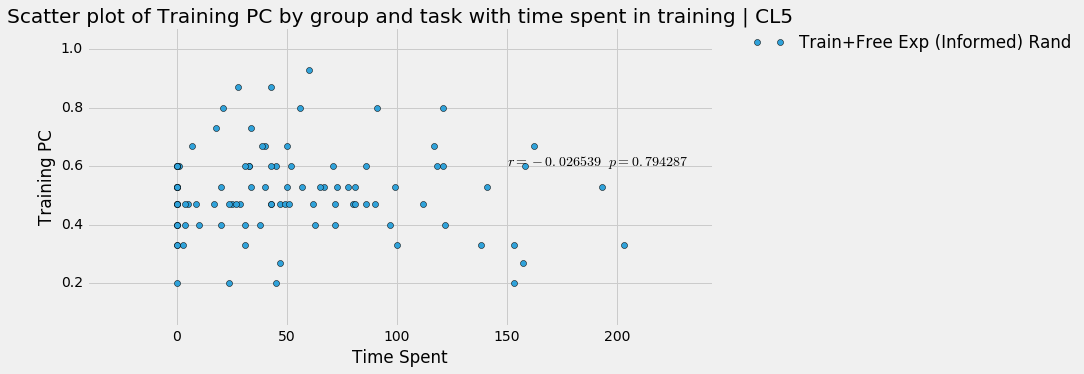

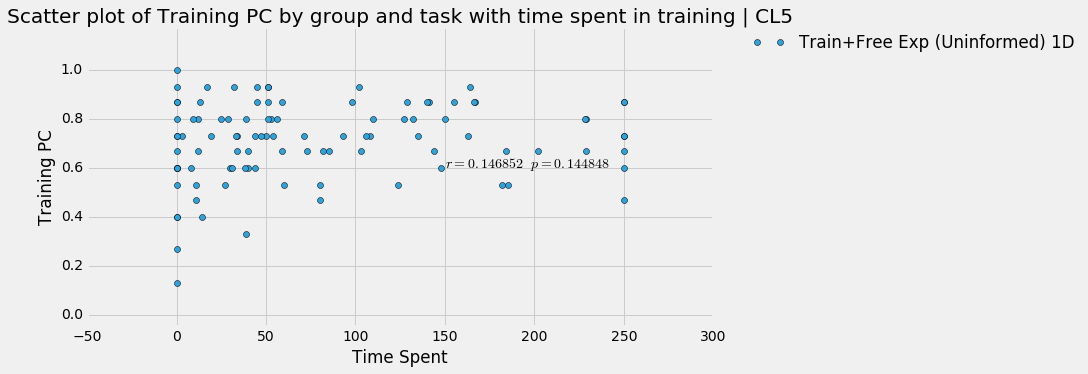

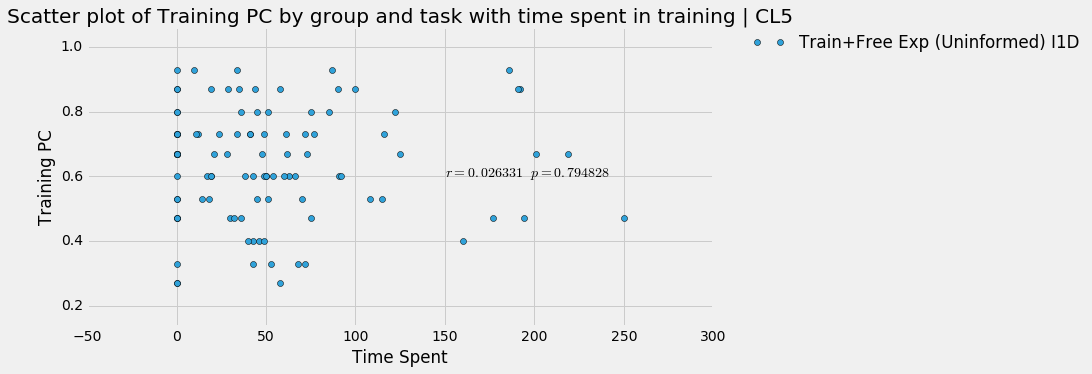

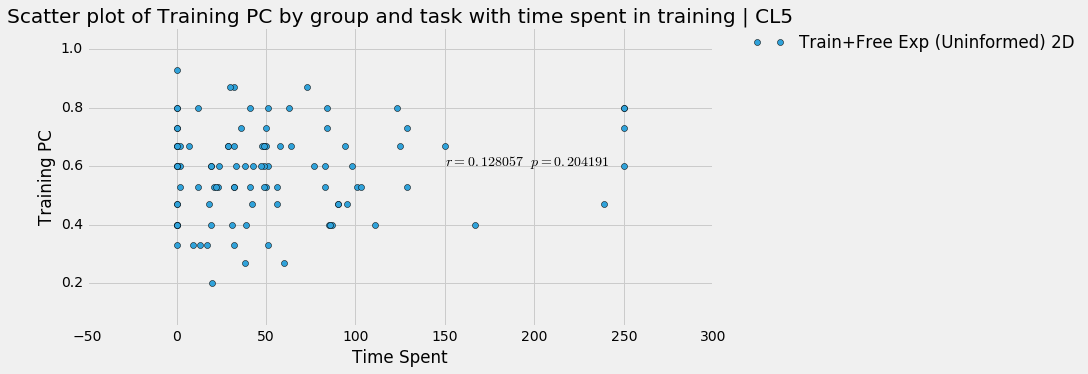

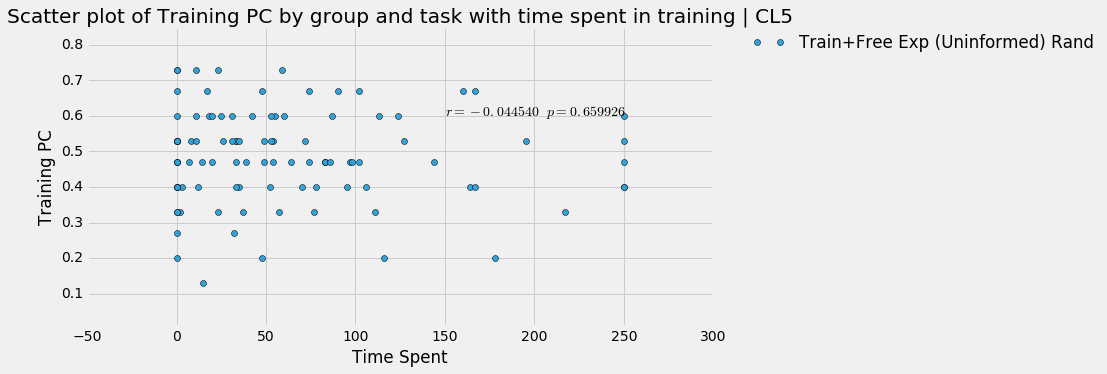

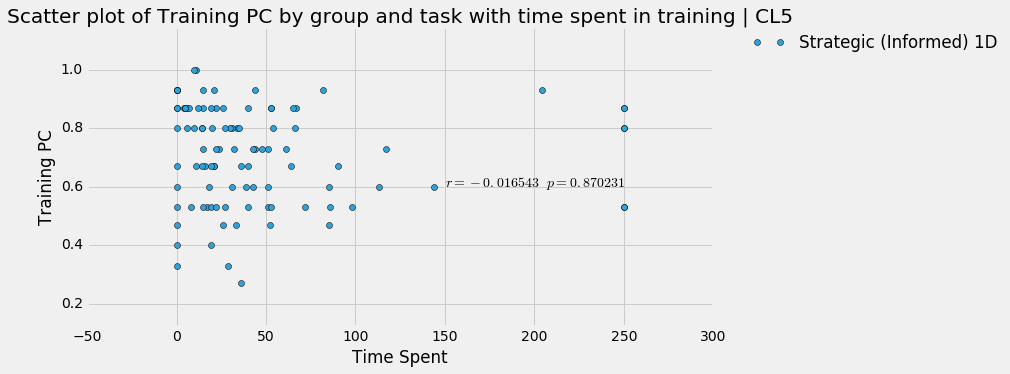

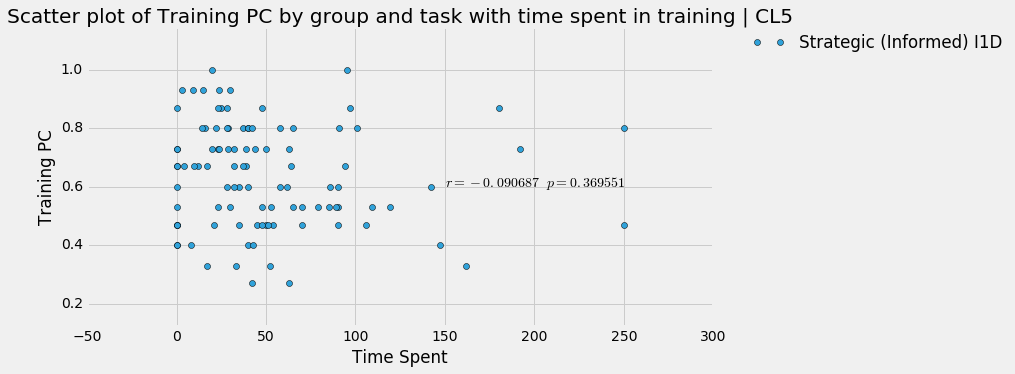

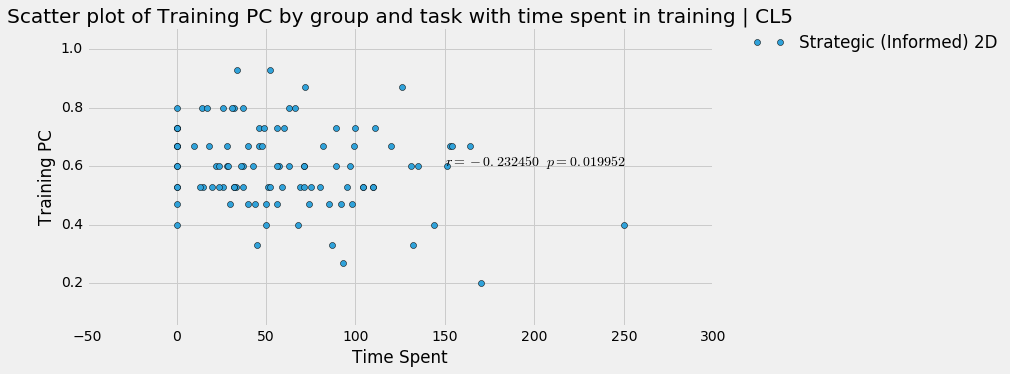

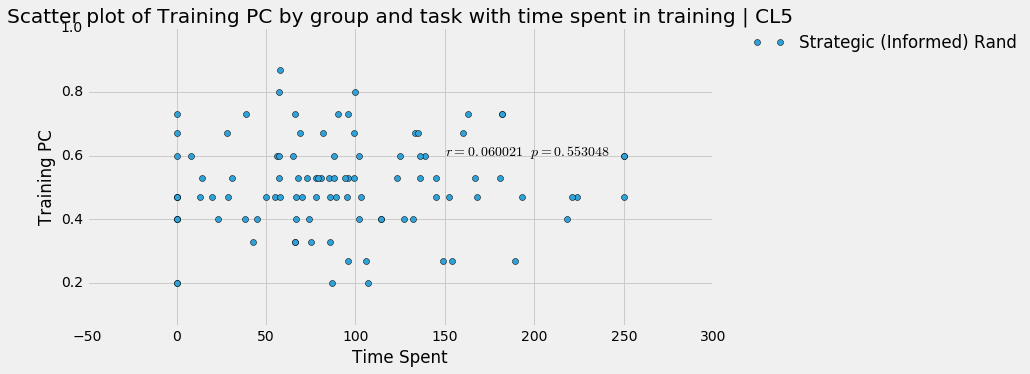

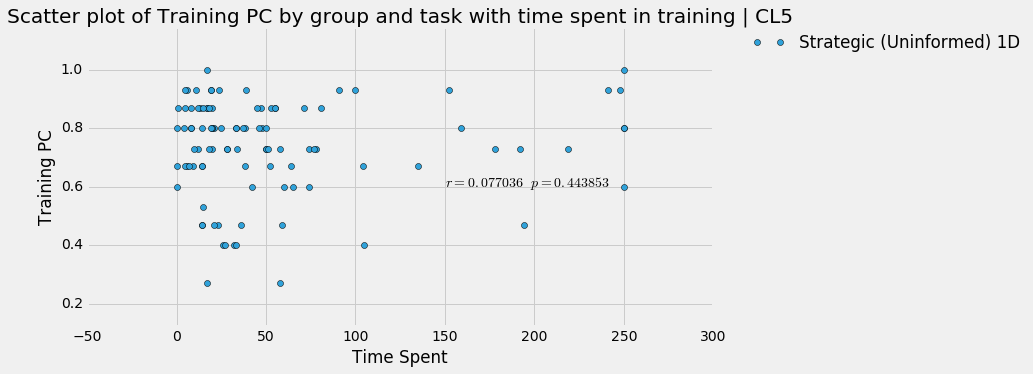

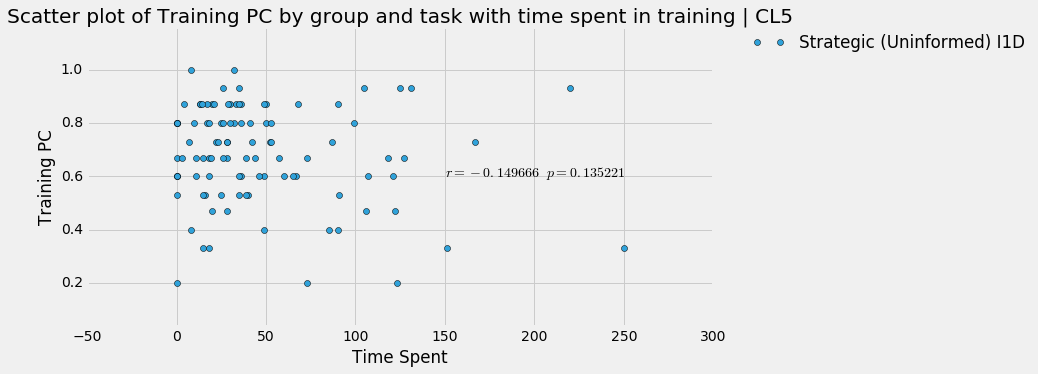

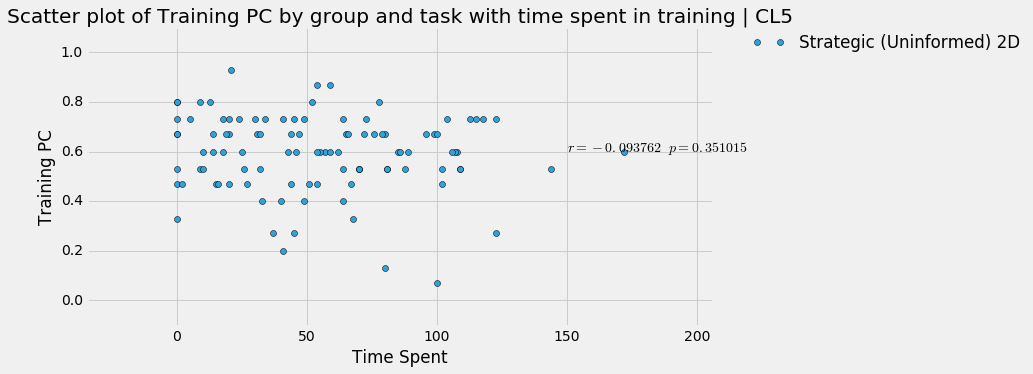

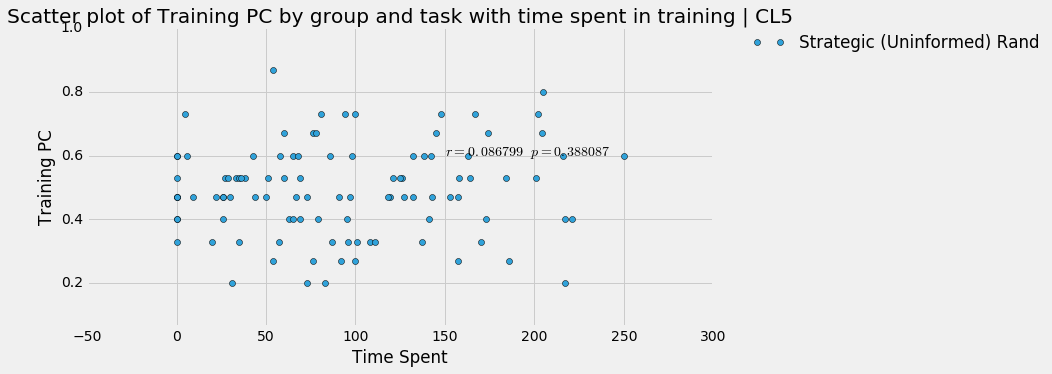

In [253]:
def CL5():
    index1 = 15 # for FT users (Training)
    index2 = 17 # for strategic users (Test)
    #PC test
   
    data_group = [informedFT[:,index1],uninformedFT[:,index1],informedST[:,index2],uninformedST[:,index2]]
    
    #PC training
    data_group2 = [informedFT[:,index1],uninformedFT[:,index1],informedST[:,index1],uninformedST[:,index1]]
    
    deltaPC = []
    #find difference between two PC (PCtest - PCtraining) for strategic
    for i in range(2,4):
        deltaPC.append(data_group[i] - data_group2[i])
    

    task_group = []
    
    # PC Test Separated by task (only Strategic Groups)
    for i in range(tasks):
        task_group.append([np.concatenate((informedST[informedST[:,2] == i][:,index2],uninformedST[uninformedST[:,2] == i][:,index2]),axis=0)])
    
    deltaPCtask_group = []
    
    # PCdiff Separated by task  
    for i in range(tasks):
        deltaPCtask_group.append([np.concatenate((deltaPC[0][i::tasks],deltaPC[1][i::tasks]),axis =0)])
    
    #histogram data by group
    bins = np.linspace(0,1.1,12)
    title = "Distribution of test PC by group | CL5"
    xlabel = "Percent Correct"
    ylabel = "Proportion"
    
   
    for i in range(2,4):
        histogram(data_group[i],bins,title,group_labels[i],xlabel,ylabel)
    
    linehistogram(data_group[2:4],bins,title,group_labels[2:4],xlabel,ylabel)
    
    
    #histogram data by task
    title = "Distribution of test PC by task | CL5"
    
    for i in range(4):
        histogram(task_group[i],bins,title,task_categories[i],xlabel,ylabel)
    
    linehistogram(task_group,bins,title,task_categories,xlabel,ylabel)
    
    #histogram data by group
    title = "Distribution of deltaPC by group | CL5"

    bins = np.linspace(-.6,0.6,12)
   
    for i in range(2):
        histogram(deltaPC[i],bins,title,group_labels[i+2],xlabel,ylabel)
    
    linehistogram(deltaPC,bins,title,group_labels[2:4],xlabel,ylabel)
    
    
    #histogram data of deltaPC by task
    title = "Distribution of deltaPC by task | CL5"
    
    for i in range(4):
        histogram(deltaPCtask_group[i],bins,title,task_categories[i],xlabel,ylabel)
    
    linehistogram(deltaPCtask_group,bins,title,task_categories,xlabel,ylabel)
    
    #Find sum of streak by task per user
    
    data_group3 = [splitCsvFTEI,splitCsvFTEU,splitCsvSTEI,splitCsvSTEU]
    userStreakArrayList = []
    
    for i in range(4):
        
        # Finding streaks for user
        streakArray = StreakArray(data_group3[i],250,0)
        userStreakArray = np.zeros((len(data_group3[i]),4))
        
        for j in range(len(data_group3[i])):
        
            # Iterate over tasks for getting sum of all streaks for that task
            for k in range(tasks):
                userStreakArray[j][k] = sum(streakArray[j][0][streakArray[j][1] == k])
        userStreakArrayList.append(userStreakArray)
    
    # PLotting scatter plots for each task per group for PC and delta PC
    title = "Scatter plot of Test PC by group and task with time spent in training | CL5"
    xlabel = "Time Spent"
    ylabel = "Test PC"
    for i in range(2,4):
        for j in range(tasks):
                fig, ax = plt.subplots(figsize=(10, 5))
                # Iterate over all users
                ax.plot(userStreakArrayList[i][:,j],data_group[i][j::4],"o",label=group_labels[i]+" "+task_categories[j])
                ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                ax.margins(0.2)
                ax.set_title(title)
                ax.set_xlabel(xlabel)
                ax.set_ylabel(ylabel)
                ax.text(150, .6, r'$r = %f \ \ p = %f$' %(stats.pearsonr(userStreakArrayList[i][:,j],data_group[i][j::4])[0],stats.pearsonr(userStreakArrayList[i][:,j],data_group[i][j::4])[1]))
    
    
    title = "Scatter plot of Delta PC by group and task with time spent in training | CL5"
    xlabel = "Time Spent"
    ylabel = "Delta PC (Test - Train)"
    for i in range(2,4):
        for j in range(tasks):
                fig, ax = plt.subplots(figsize=(10, 5))
                # Iterate over all users
                ax.plot(userStreakArrayList[i][:,j],deltaPC[i-2][j::4],"o",label=group_labels[i]+" "+task_categories[j])
                ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                ax.margins(0.2)
                ax.set_title(title)
                ax.set_xlabel(xlabel)
                ax.set_ylabel(ylabel)
                ax.text(150, .6, r'$r = %f \ \ p = %f$' %(stats.pearsonr(userStreakArrayList[i][:,j],deltaPC[i-2][j::4])[0],stats.pearsonr(userStreakArrayList[i][:,j],deltaPC[i-2][j::4])[1]))
    
    
    title = "Scatter plot of Training PC by group and task with time spent in training | CL5"
    xlabel = "Time Spent"
    ylabel = "Training PC"
    for i in range(4):
        for j in range(tasks):
                fig, ax = plt.subplots(figsize=(10, 5))
                # Iterate over all users
                ax.plot(userStreakArrayList[i][:,j],data_group2[i][j::4],"o",label=group_labels[i]+" "+task_categories[j])
                ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                ax.margins(0.2)
                ax.set_title(title)
                ax.set_xlabel(xlabel)
                ax.set_ylabel(ylabel)
                ax.text(150, .6, r'$r = %f \ \ p = %f$' %(stats.pearsonr(userStreakArrayList[i][:,j],data_group2[i][j::4])[0],stats.pearsonr(userStreakArrayList[i][:,j],data_group2[i][j::4])[1]))
    
    
    
     
    
    
    
CL5()


### CL 7 are some individuals more “sticky” than others, and does this correlate with performance? 

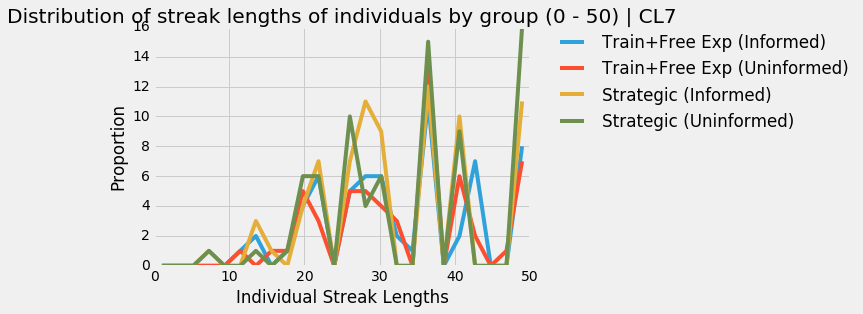

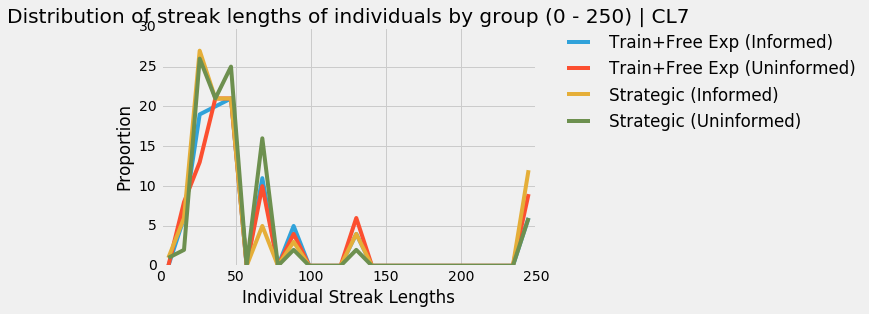

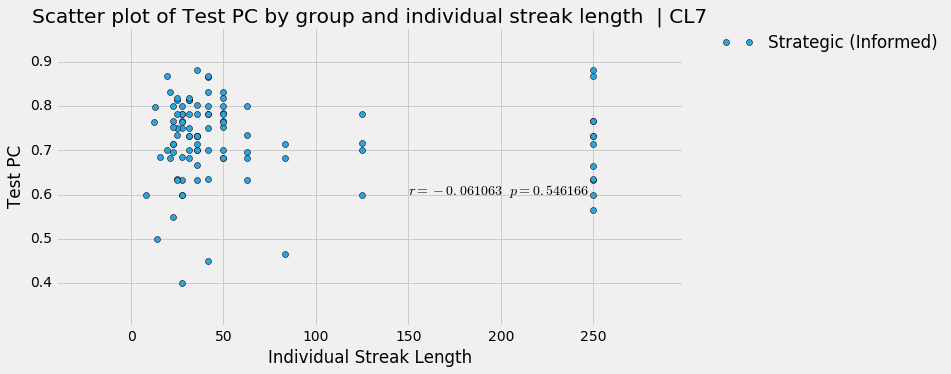

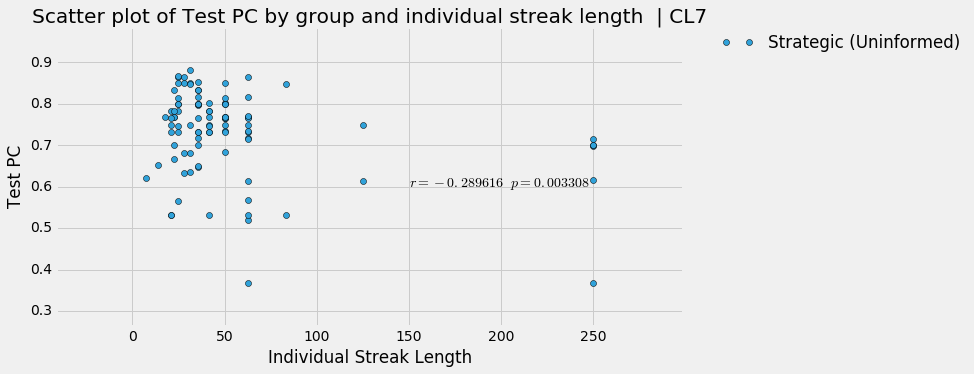

In [215]:
#Finding individuals streak lengths
def CL7():
    from itertools import groupby
    
    data_group = [splitCsvFTEI,splitCsvFTEU,splitCsvSTEI,splitCsvSTEU]
    indexTestPC = 17
    testPCAverage = [np.mean(informedST[:,indexTestPC].reshape(-1, 4), axis=1),np.mean(uninformedST[:,indexTestPC].reshape(-1, 4), axis=1)]
    streakAverage =[[] for x in xrange(len(data_group))]
    
    
    for i in range(len(data_group)):
        
        for j in range(len(data_group[i])):
            grouped_L = [sum(1 for i in g) for k,g in groupby(data_group[i][j][:,1])]
            streakAverage[i].append(sum(grouped_L)/len(grouped_L))
            #print sum(grouped_L)/len(grouped_L)
    
    
    bins = np.linspace(0,50,25)
    title = "Distribution of streak lengths of individuals by group (0 - 50) | CL7"
    xlabel = "Individual Streak Lengths"
    ylabel = "Proportion"
    
   
    linehistogram(streakAverage,bins,title,group_labels,xlabel,ylabel)
    
    bins = np.linspace(0,250,25)
    title = "Distribution of streak lengths of individuals by group (0 - 250) | CL7"
    xlabel = "Individual Streak Lengths"
    ylabel = "Proportion"
    
   
    linehistogram(streakAverage,bins,title,group_labels,xlabel,ylabel)
    
    title = "Scatter plot of Test PC by group and individual streak length  | CL7"
    xlabel = "Individual Streak Length"
    ylabel = "Test PC"
    for i in range(2,4):
        fig, ax = plt.subplots(figsize=(10, 5))
        # Iterate over all users
        ax.plot(streakAverage[i],testPCAverage[i-2],"o",label=group_labels[i])
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        ax.margins(0.2)
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.text(150, .6, r'$r = %f \ \ p = %f$' %(stats.pearsonr(streakAverage[i],testPCAverage[i-2])[0],stats.pearsonr(streakAverage[i],testPCAverage[i-2])[1]))
        
CL7()

### CL 8  the bimodal distribution of learning

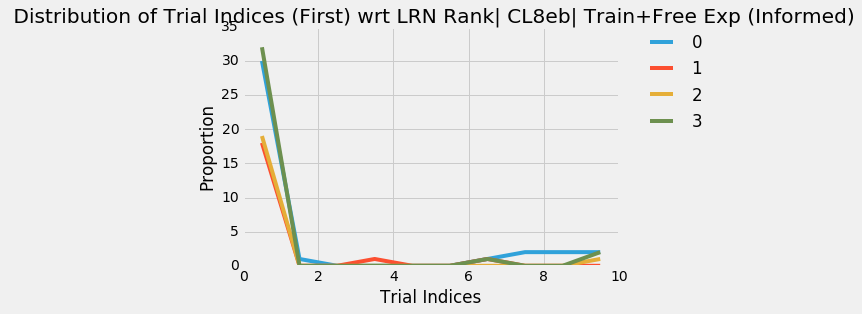

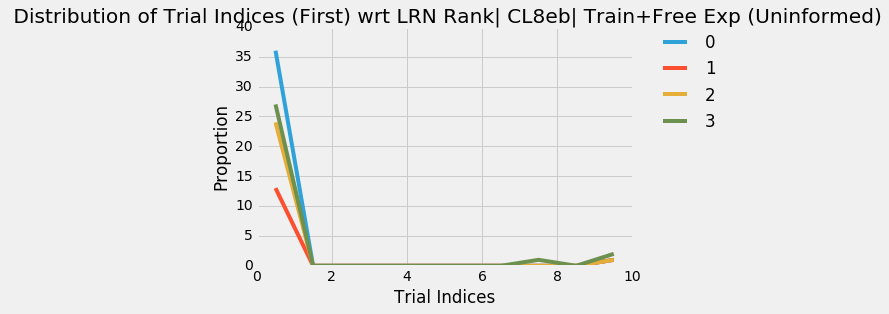

In [241]:
from itertools import groupby
def split(arr, cond):
    return [arr[cond], arr[~cond]]

def StreakAverage(groupUserArr):
    # find average streak of users, across all tasks
    streakAverage =[[] for x in xrange(len(data_groupUser))]
    for i in range(len(groupUserArr)):
        
        for j in range(len(groupUserArr[i])):
            grouped_L = [sum(1 for i in g) for k,g in groupby(groupUserArr[i][j][:,1])]
            
            #Do it 4 times for later record keeping
            for k in range(4):
                streakAverage[i].append(sum(grouped_L)/len(grouped_L))
    return streakAverage
def CL8():
    index1 = 15 # for FT users (Training)
    index2 = 17 # for strategic users (Test)
    
    #PC test
    data_group = [informedST[:,index2],uninformedST[:,index2]]
    
    #PC training
    data_group2 = [informedST[:,index1],uninformedST[:,index1]]
    
    #user group data
    data_groupUser = [splitCsvFTEI,splitCsvFTEU,splitCsvSTEI,splitCsvSTEU]
    
    
    
    
    deltaPC = [[] for x in xrange(2)]
    #find difference between two PC (PCtest - PCtraining) for strategic 
    for i in range(2):
        deltaPC[i].extend(data_group[i] - data_group2[i]) 
        
    
    deltaPCtask_group = [[] for x in xrange(2)]
    
    # PCdiff Separated by task  
    for i in range(tasks):
        deltaPCtask_group[0].append(deltaPC[0][i::tasks])
        deltaPCtask_group[1].append(deltaPC[1][i::tasks])
    
    
    
    groupCategory = ["hiL", "loL"]
    
    return deltaPC,groupCategory

def CL8a():
    
    deltaPC,groupCategory = CL8()
    
    
    streakAverage = StreakAverage([splitCsvSTEI,splitCsvSTEU])
    
    #Forming records of userID, informed, category and deltaPC
    recordInformed = createRecord([informedST[:,0],informedST[:,1],informedST[:,2],np.array(deltaPC[0]),np.array(streakAverage[0])],["id","condition","category","deltaPC","avgStreak"])
    recordUninformed = createRecord([uninformedST[:,0],uninformedST[:,1],uninformedST[:,2],np.array(deltaPC[1]),np.array(streakAverage[1])],["id","condition","category","deltaPC","avgStreak"])
    
    deltaRecord = [[] for x in xrange(2)]
    
    for i in range(len(categories)):
        # Concatenate both the user strategic groups
        # Split the groups by hiL, ioL
        splitRecordCategoryInformed = split(recordInformed[recordInformed['category'] == i],recordInformed[recordInformed['category'] == i]["deltaPC"]>0)
        splitRecordCategoryUninformed = split(recordUninformed[recordUninformed['category'] == i],recordUninformed[recordUninformed['category'] == i]["deltaPC"]>0)
    
    
        # Get delta positive user record and delta negativeuser records
        deltaRecord[0].extend([ j  for j in splitCsvSTEI if j[:,0][0] in splitRecordCategoryInformed[0]["id"]])
        deltaRecord[0].extend([ j  for j in splitCsvSTEU if j[:,0][0] in splitRecordCategoryUninformed[0]["id"]])
        deltaRecord[1].extend([ j  for j in splitCsvSTEI if j[:,0][0] in splitRecordCategoryInformed[1]["id"]])
        deltaRecord[1].extend([ j  for j in splitCsvSTEU if j[:,0][0] in splitRecordCategoryUninformed[1]["id"]])
        
        
        #print splitRecordCategoryInformed[0]["avgStreak"]
        title = " Distribution of average streak length (across all tasks) | CL8a| "
        xlabel = "streak length"
        ylabel = "% of people"
        
        #print deltaRecord[0]
        #linehistogram([deltaRecord[0]['avgStreak'],deltaRecord[1]['avgStreak']],np.linspace(0,250,26),title+categories[i],["HIgh Skilled","Low Skilled"],xlabel,ylabel)
        linehistogramPercentage([np.concatenate((splitRecordCategoryInformed[0]["avgStreak"],splitRecordCategoryUninformed[0]["avgStreak"]),axis=0),np.concatenate((splitRecordCategoryInformed[1]["avgStreak"],splitRecordCategoryUninformed[1]["avgStreak"]),axis=0)],np.linspace(0,250,25),title+categories[i],groupCategory,xlabel,ylabel)
        
    
    
def CL8b():
 
    deltaPC,groupCategory = CL8()
    
    #Forming records of userID, informed, category and deltaPC
    recordInformed = createRecord([informedST[:,0],informedST[:,1],informedST[:,2],np.array(deltaPC[0])],["id","condition","category","deltaPC"])
    recordUninformed = createRecord([uninformedST[:,0],uninformedST[:,1],uninformedST[:,2],np.array(deltaPC[1])],["id","condition","category","deltaPC"])
    
    #Split record by category
    recordCategoryInformed = [[] for x in xrange(len(categories))]
    recordCategoryUninformed = [[] for x in xrange(len(categories))]
    #userRecordCategory = np.concatenate((splitCsvSTEI,splitCsvSTEU),axis= 0)
    deltaRecord = [[] for x in xrange(2)]
    tempRecord = [[] for x in xrange(2)]
    
    
    
    #Distribution of probability of switching of two groups
    for i in range(len(categories)):
        
        
        # Concatenate both the user strategic groups
        # Split the groups by hiL, ioL
        splitRecordCategoryInformed = split(recordInformed[recordInformed['category'] == i],recordInformed[recordInformed['category'] == i]["deltaPC"]>0)
        splitRecordCategoryUninformed = split(recordUninformed[recordUninformed['category'] == i],recordUninformed[recordUninformed['category'] == i]["deltaPC"]>0)
    
    
        # Get delta positive user record and delta negativeuser records
        deltaRecord[0].extend([ j  for j in splitCsvSTEI if j[:,0][0] in splitRecordCategoryInformed[0]["id"]])
        deltaRecord[0].extend([ j  for j in splitCsvSTEU if j[:,0][0] in splitRecordCategoryUninformed[0]["id"]])
        deltaRecord[1].extend([ j  for j in splitCsvSTEI if j[:,0][0] in splitRecordCategoryInformed[1]["id"]])
        deltaRecord[1].extend([ j  for j in splitCsvSTEU if j[:,0][0] in splitRecordCategoryUninformed[1]["id"]])
        
        
        
        #p(switch)
        #Delta Positive  probability switch 
        
        tempRecord[0] = getProbSwitch(deltaRecord[0],np.array(StreakArray(deltaRecord[0],250,0)),250)
        
        #Delta Positive  probability switch 
        tempRecord[1] = getProbSwitch(deltaRecord[1],np.array(StreakArray(deltaRecord[1],250,0)),250)
        
        bins = np.linspace(0,250,25)
        title = "Distribution of probability of switch | CL8b"
        xlabel = "streak length"
        ylabel = "Proportion"
        
        fig, ax = plt.subplots(figsize=(10, 5))
        
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        
        
        ax.set_title(title+ "| "+task_categories[i]+"| "+ "0 : 100")
        ax.plot(np.arange(100),tempRecord[0].mean(axis = 0)[0:100],label = groupCategory[0])
        ax.plot(np.arange(100),tempRecord[1].mean(axis = 0)[0:100],label = groupCategory[1])
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title+ "| "+task_categories[i]+ "| "+ "0 : 20")
        ax.plot(np.arange(20),tempRecord[0].mean(axis = 0)[0:20],label = groupCategory[0])
        ax.plot(np.arange(20),tempRecord[1].mean(axis = 0)[0:20],label = groupCategory[1])
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title+ "| "+task_categories[i]+ "| "+ "20 : 40")
        ax.plot(np.arange(20,40),tempRecord[0].mean(axis = 0)[20:40],label = groupCategory[0])
        ax.plot(np.arange(20,40),tempRecord[1].mean(axis = 0)[20:40],label = groupCategory[1])
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title+ "| "+task_categories[i]+ "| "+ "40 : 60")
        ax.plot(np.arange(40,60),tempRecord[0].mean(axis = 0)[40:60],label = groupCategory[0])
        ax.plot(np.arange(40,60),tempRecord[1].mean(axis = 0)[40:60],label = groupCategory[1])
        
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
#Finding time taken on a task by the two groups    
def CL8c():
    deltaPC,groupCategory = CL8()
    
    #Forming records of userID, informed, category and deltaPC
    recordInformed = createRecord([informedST[:,0],informedST[:,1],informedST[:,2],np.array(deltaPC[0])],["id","condition","category","deltaPC"])
    recordUninformed = createRecord([uninformedST[:,0],uninformedST[:,1],uninformedST[:,2],np.array(deltaPC[1])],["id","condition","category","deltaPC"])
    
    #Split record by category
    recordCategoryInformed = [[] for x in xrange(len(categories))]
    recordCategoryUninformed = [[] for x in xrange(len(categories))]
    deltaRecord = [[] for x in xrange(2)]
    tempRecord = [[] for x in xrange(2)]
    
    #Forming records of userID, informed, category and deltaPC
    recordInformed = createRecord([informedST[:,0],informedST[:,1],informedST[:,2],np.array(deltaPC[0])],["id","condition","category","deltaPC"])
    recordUninformed = createRecord([uninformedST[:,0],uninformedST[:,1],uninformedST[:,2],np.array(deltaPC[1])],["id","condition","category","deltaPC"])
    
    #Split record by category
    recordCategoryInformed = [[] for x in xrange(len(categories))]
    recordCategoryUninformed = [[] for x in xrange(len(categories))]
    
    tempRecord = [[] for x in xrange(2)]
    
    
    
    #Distribution of probability of switching of two groups
    for i in range(len(categories)):
        deltaRecord = [[] for x in xrange(2)]
        
    
        # Concatenate both the user strategic groups
        # Split the groups by hiL, ioL
        splitRecordCategoryInformed = split(recordInformed[recordInformed['category'] == i],recordInformed[recordInformed['category'] == i]["deltaPC"]>0)
        splitRecordCategoryUninformed = split(recordUninformed[recordUninformed['category'] == i],recordUninformed[recordUninformed['category'] == i]["deltaPC"]>0)
        
        
        # Get delta positive user record and delta negativeuser records
        deltaRecord[0].extend([ j  for j in splitCsvSTEI if j[:,0][0] in splitRecordCategoryInformed[0]["id"]])
        deltaRecord[0].extend([ j  for j in splitCsvSTEU if j[:,0][0] in splitRecordCategoryUninformed[0]["id"]])
        deltaRecord[1].extend([ j  for j in splitCsvSTEI if j[:,0][0] in splitRecordCategoryInformed[1]["id"]])
        deltaRecord[1].extend([ j  for j in splitCsvSTEU if j[:,0][0] in splitRecordCategoryUninformed[1]["id"]])
        
        
        title = " Distribution of Time Spent on task in training | CL8c| "
        xlabel = "Time Spent on Task"
        ylabel = "% of people"
        linehistogramPercentage([getTaskCount(deltaRecord[0])[:,i],getTaskCount(deltaRecord[1])[:,i]],np.linspace(0,250,26),title+categories[i],groupCategory,xlabel,ylabel)
        
# PC in the training phase: did the hiL people simply start out doing better on that task?
def CL8d():
    deltaPC,groupCategory = CL8()
    
    #Forming records of userID, informed, category and deltaPC
    recordInformed = createRecord([informedST[:,0],informedST[:,1],informedST[:,2],np.array(deltaPC[0]),informedST[:,15]],["id","condition","category","deltaPC","trainingPC"])
    recordUninformed = createRecord([uninformedST[:,0],uninformedST[:,1],uninformedST[:,2],np.array(deltaPC[1]),uninformedST[:,15]],["id","condition","category","deltaPC","trainingPC"])
    
    #Split record by category
    recordCategoryInformed = [[] for x in xrange(len(categories))]
    recordCategoryUninformed = [[] for x in xrange(len(categories))]
    tempRecord = [[] for x in xrange(2)]
    
    for i in range(len(categories)):
        deltaRecord = [[] for x in xrange(2)]
        
    
        # Concatenate both the user strategic groups
        # Split the groups by hiL, ioL
        splitRecordCategoryInformed = split(recordInformed[recordInformed['category'] == i],recordInformed[recordInformed['category'] == i]["deltaPC"]>0)
        splitRecordCategoryUninformed = split(recordUninformed[recordUninformed['category'] == i],recordUninformed[recordUninformed['category'] == i]["deltaPC"]>0)
    
   
        
        title = " Distribution of PC during Training| CL8d| "
        xlabel = "PC Training"
        ylabel = "% of people"
        linehistogramPercentage([np.concatenate((splitRecordCategoryInformed[0]["trainingPC"],splitRecordCategoryUninformed[0]["trainingPC"]),axis=0),np.concatenate((splitRecordCategoryInformed[1]["trainingPC"],splitRecordCategoryUninformed[1]["trainingPC"]),axis=0)],np.linspace(0,1,25),title+categories[i],groupCategory,xlabel,ylabel)

def IndexFirstOccurence(userArr):
    firstIndex = np.empty([len(userArr),4])
    for i in range(len(userArr)):
        for j in range(4):
            if np.argmax(userArr[i][:,1] == j) > 0 or j in userArr[i][:,1]:
                firstIndex[i][j] = np.argmax(userArr[i][:,1] == j)
            else:
                firstIndex[i][j] = -1
    return firstIndex
        
def CL8e():
    groupCategory = ["hiL", "loL"]
    # Get index of first occurence
    firstIndex = [[] for x in xrange(2)]
    
    tr_cat = [[] for x in xrange(2)]
    
    firstIndex[0] =  IndexFirstOccurence(splitCsvSTEI)
    firstIndex[1] =  IndexFirstOccurence(splitCsvSTEU)     
    tr_cat[0] = getRankOrder(informedST,12)
    tr_cat[1] = getRankOrder(uninformedST,12)
    
    # Iterate over all users to get regression line
    slope = [[] for x in xrange(2)]
    data_groupUser = [splitCsvSTEI,splitCsvSTEU]
    for i in range(len(data_groupUser)):
        for j in range(len(data_groupUser[i])):
            for k in range(4):
                slope[i].append(stats.linregress(tr_cat[i][j],firstIndex[i][j])[0])
    
    #Forming records of userID, informed, category and deltaPC
    recordInformed = createRecord([informedST[:,0],informedST[:,2],np.array(deltaPC[0]),np.array(slope[0]),np.array(tr_cat[0]).ravel(),np.array(firstIndex[0]).ravel()],["id","category","deltaPC","slope","LRNrating","firstTrialIndex"])
    recordUninformed = createRecord([uninformedST[:,0],uninformedST[:,2],np.array(deltaPC[1]),np.array(slope[1]),np.array(tr_cat[1]).ravel(),np.array(firstIndex[1]).ravel()],["id","category","deltaPC","slope","LRNrating","firstTrialIndex"])
    
    
    #Split according to category and delta
    for i in range(len(categories)):
        splitRecordCategoryInformed = split(recordInformed[recordInformed['category'] == i],recordInformed[recordInformed['category'] == i]["deltaPC"]>0)
        splitRecordCategoryUninformed = split(recordUninformed[recordUninformed['category'] == i],recordUninformed[recordUninformed['category'] == i]["deltaPC"]>0)
        title = " Slope Distribution of (Trial Index/LRN)| CL8e| "
        xlabel = "Slope Distribution"
        ylabel = "% of people"
        linehistogramPercentage([np.concatenate((splitRecordCategoryInformed[0]["slope"],splitRecordCategoryUninformed[0]["slope"]),axis=0),np.concatenate((splitRecordCategoryInformed[1]["slope"],splitRecordCategoryUninformed[1]["slope"]),axis=0)],np.linspace(-1,1,25),title+categories[i],groupCategory,xlabel,ylabel)
    
    
    title = " Distribution of Trial Indices (First) wrt LRN Rank| CL8eb| "
    xlabel = "Trial Indices"
    ylabel = "Proportion"
    temp = [[] for x in xrange(4)]
    for j in range(4):
        
        temp[j].append(recordInformed[recordInformed["LRNrating"] == j]["firstTrialIndex"])
    
    linehistogramPercentage(temp,np.linspace(1,10,11),title + group_labels[2],[0,1,2,3],xlabel,ylabel)
    
    temp = [[] for x in xrange(4)]
    
    for j in range(4):
        temp[j].append(recordUninformed[recordUninformed["LRNrating"] == j]["firstTrialIndex"])
    linehistogramPercentage(temp,np.linspace(1,10,11),title + group_labels[3],[0,1,2,3],xlabel,ylabel)
    
def CL8eTraining():
    groupCategory = ["hiL", "loL"]
    # Get index of first occurence
    firstIndex = [[] for x in xrange(2)]
    
    tr_cat = [[] for x in xrange(2)]
    
    firstIndex[0] =  IndexFirstOccurence(splitCsvFTEI)
    firstIndex[1] =  IndexFirstOccurence(splitCsvFTEU)     
    tr_cat[0] = getRankOrder(informedFT,12)
    tr_cat[1] = getRankOrder(uninformedFT,12)
    # Iterate over all users to get regression line
    data_groupUser = [splitCsvFTEI,splitCsvFTEU]
    '''
    for i in range(len(data_groupUser)):
        for j in range(len(data_groupUser[i])):
            for k in range(4):
                slope[i].append(stats.linregress(tr_cat[i][j],firstIndex[i][j])[0])
    '''
    #Forming records of userID, informed, category and deltaPC
    recordInformed = createRecord([informedFT[:,0],informedFT[:,2],np.array(tr_cat[0]).ravel(),np.array(firstIndex[0]).ravel()],["id","category","LRNrating","firstTrialIndex"])
    recordUninformed = createRecord([uninformedFT[:,0],uninformedFT[:,2],np.array(tr_cat[1]).ravel(),np.array(firstIndex[1]).ravel()],["id","category","LRNrating","firstTrialIndex"])
    
    '''
    #Split according to category and delta
    for i in range(len(categories)):
        splitRecordCategoryInformed = split(recordInformed[recordInformed['category'] == i],recordInformed[recordInformed['category'] == i]["deltaPC"]>0)
        splitRecordCategoryUninformed = split(recordUninformed[recordUninformed['category'] == i],recordUninformed[recordUninformed['category'] == i]["deltaPC"]>0)
        title = " Slope Distribution of (Trial Index/LRN)| CL8e| "
        xlabel = "Slope Distribution"
        ylabel = "% of people"
        linehistogramPercentage([np.concatenate((splitRecordCategoryInformed[0]["slope"],splitRecordCategoryUninformed[0]["slope"]),axis=0),np.concatenate((splitRecordCategoryInformed[1]["slope"],splitRecordCategoryUninformed[1]["slope"]),axis=0)],np.linspace(-1,1,25),title+categories[i],groupCategory,xlabel,ylabel)
    
    '''
    title = " Distribution of Trial Indices (First) wrt LRN Rank| CL8eb| "
    xlabel = "Trial Indices"
    ylabel = "Proportion"
    temp = [[] for x in xrange(4)]
    for j in range(4):
        
        temp[j].append(recordInformed[recordInformed["LRNrating"] == j]["firstTrialIndex"])
    #print temp
    #print len(temp)
    linehistogramPercentage(temp,np.linspace(0,10,11),title + group_labels[0],[0,1,2,3],xlabel,ylabel)
    
    temp = [[] for x in xrange(4)]
    
    for j in range(4):
        temp[j].append(recordUninformed[recordUninformed["LRNrating"] == j]["firstTrialIndex"])
    linehistogramPercentage(temp,np.linspace(0,10,11),title + group_labels[1],[0,1,2,3],xlabel,ylabel)
CL8a()
CL8b()
CL8c()
CL8d()
CL8e()
CL8eTraining()


        
    

###  does P(switch) depend on recent PC?

In [212]:
x = np.array(StreakArray(splitCsvFTEI,250,0))[:,0]
index = np.array(StreakArray(splitCsvFTEI,250,0))[:,1]
StreakPC = [[] for z in xrange(4)]
StreakPC10 = [[] for z in xrange(4)]
y = splitCsvFTEI

for i in range(len(x)):
    start = 0
    #print x[i]
    #print y[i][:,1]
    for j in range(len(x[i])-1):
        # Calculate PC for the first 10 trials for every streak > 10
        
        if x[i][j] > 10:
            #StreakPC[index[i][j]].extend(np.sum(y[i][:,2][start:(x[i][j]+start)])/(float(x[i][j])))
            StreakPC[index[i][j]].append(np.sum(y[i][:,2][start:(x[i][j]+start)][0:10])/10.0)
            #print np.sum(y[i][:,2][start:(x[i][j]+start)])/float(x[i][j])
        if x[i][j] == 10:
            
            #print y[i][:,2][start:(x[i][j]+start)],index[i][j]
            StreakPC10[index[i][j]].append(np.sum(y[i][:,2][start:(x[i][j]+start)][0:10])/10.0)
            #print np.sum(y[i][:,2][start:(x[i][j]+start)][0:10])
        start = start + x[i][j]

print len(StreakPC[3])
print len(StreakPC10[3])
#for i in range(len(splitCsvFTEI)):
    
    #Find PC every 10 trials
    #print splitCsvFTEI[i][:,1]

[50 58 34 20 63  8 10  7]
[65 18 76 10  8 63 10]
[33 45 49  4  5 10 43 33 28]
[10 50 33 10 13 39 95]
[10 50 33 10 13 39 95]
[  6  10 161  25   1  11   6   7   5  18]
[16 19 20 24 11  8 15  8  6 10 11 20  8  5  6 17 12  6  8 20]
[ 28  14  10  14  33 151]
[24 11 21 14 20 18 28  5 21 47 10 31]
[ 6  9  9  6 10 10  6  7  4 10  9  3 12  8 15  7  8  8  4 13 11 10 65]
[ 6  9  9  6 10 10  6  7  4 10  9  3 12  8 15  7  8  8  4 13 11 10 65]
[ 6  9  9  6 10 10  6  7  4 10  9  3 12  8 15  7  8  8  4 13 11 10 65]
[ 6  9  9  6 10 10  6  7  4 10  9  3 12  8 15  7  8  8  4 13 11 10 65]
[33 68 17  8  6  9 23 25 17 12 10 15  7]
[10 21 29 12 10  9 44 12 17 48 18 18  2]
[10 21 29 12 10  9 44 12 17 48 18 18  2]
[20 17  4 10 11 59 50 10  9 28 32]
[20 17  4 10 11 59 50 10  9 28 32]
[ 9 10 15 24 22 43  3 24 47 17 36]
117
4


### Extra cells (Exploration Purposes --- please ignore)

In [57]:
print np.mean(getTaskCount(splitCsvSTEI),axis=0)

[ 47.28  51.15  60.03  91.54]


In [37]:
index1 = 15 # for FT users (Training)
index2 = 17
streakAverage =[[] for x in xrange(4)]
#user group data
data_groupUser = [splitCsvFTEI,splitCsvFTEU,splitCsvSTEI,splitCsvSTEU]
for i in range(4):
        
        for j in range(len(data_groupUser[i])):
            grouped_L = [sum(1 for i in g) for k,g in groupby(data_groupUser[i][j][:,1])]
            
            #Do it 4 times for later record keeping
            for k in range(4):
                streakAverage[i].append(sum(grouped_L)/len(grouped_L))
#PC test
data_group = [informedST[:,index2],uninformedST[:,index2]]
    
    #PC training
data_group2 = [informedST[:,index1],uninformedST[:,index1]]
deltaPC = [[] for x in xrange(2)]
    #find difference between two PC (PCtest - PCtraining) for strategic 
for i in range(2):
    deltaPC[i].extend(data_group[i] - data_group2[i]) 
recordInformed = createRecord([informedST[:,0],informedST[:,1],informedST[:,2],np.array(deltaPC[0]),np.array(streakAverage[2])],["id","condition","category","deltaPC","avgStreak"])
recordUninformed = createRecord([uninformedST[:,0],uninformedST[:,1],uninformedST[:,2],np.array(deltaPC[1]),np.array(streakAverage[3])],["id","condition","category","deltaPC","avgStreak"])
recordCategory = [[] for x in xrange(len(categories))]
for i in range(4):
    recordCategory[i].append(np.concatenate((recordInformed[recordInformed['category'] == i],recordUninformed[recordUninformed['category'] == i]),axis = 0))
    splitRecordCategory = split(recordCategory[i][0],recordCategory[i][0]["deltaPC"]>0)

print splitRecordCategory[1]["id"]


[   4.    5.    7.   11.   12.   16.   25.   26.   39.   40.   41.   43.
   45.   49.   52.   53.   59.   61.   65.   66.   68.   69.   71.   74.
   77.   79.   88.   91.   92.   93.   94.   98.   99.  102.  106.  108.
  109.  118.  122.  126.  127.  129.  130.  131.  132.  134.  140.  143.
  149.  150.  151.  152.  153.  160.  163.  165.  166.  178.  182.  194.
  196.  199.  200.    0.    3.    6.    9.   18.   20.   22.   24.   27.
   30.   35.   37.   38.   56.   58.   60.   63.   64.   73.   75.   78.
   80.   81.   86.   96.  101.  104.  111.  112.  113.  116.  117.  123.
  124.  137.  138.  139.  141.  144.  147.  148.  159.  162.  164.  168.
  173.  176.  179.  180.  189.  190.  192.  197.  198.]


In [263]:
mylist = [1, 2, 3, 4, 5, 6, 7]
N = 3
cumsum, moving_aves = [0], []

for i, x in enumerate(mylist, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)
print moving_aves

[2.0, 3.0, 4.0, 5.0, 6.0]


In [275]:
#Calculate PC at every instant of the exploratory trial per task
'''
def instantPC():
    #data_group = [splitCsvFTEI,splitCsvFTEU,splitCsvSTEI,splitCsvSTEU]
    data_group = [splitCsvFTEI]
    
    for i in range(len(data_group)):
        
        for j in range(len(data_group[i])):
            #First chosen task
            temp = data_group[i][j][0,1]
            for k in range(len(data_group[i][j])):
                da
instantPC()
'''

from itertools import groupby
#L = [0, 0, 0, 3, 3, 2, 5, 2, 6, 6]
L = splitCsvFTEI[0][:,1]
grouped_L = [(k, sum(1 for i in g)) for k,g in groupby(L)]
# Or (k, len(list(g))), but that creates an intermediate list
print grouped_L[0][1]
#[(0, 3), (3, 2), (2, 1), (5, 1), (2, 1), (6, 2)]

33


In [268]:
cummean = lambda x:  x.cumsum()/np.arange(1, len(x)+1)
#x = np.random.normal(0,1,100)
x = np.arange(1,100)
print x
print cummean(x)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
[  1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5
   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5  12.   12.5
  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5  18.   18.5
  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5  24.   24.5
  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5  30.   30.5
  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5  36.   36.5
  37.   37.5  38.   38.5  39.   39.5  40.   40.5  41.   41.5  42.   42.5
  43.   43.5  44.   44.5  45.   45.5  46.   46.5  47.   47.5  48.   48.5
  49.   49.5  50. ]
